# Análisis de datos exploratorios en el conjunto de datos de 5.benign.csv

El objetivo de este kernal es realizar análisis de datos exploratorios (EDA) y modelado estadístico en el conjunto nbaIoT  para recopilar información y predecir eventualmente ataques a en entornos de red IoT. 

He descrito a continuación el proceso que seguí para realizar el procedimiento antes mencionado.

1. Importar las librerías de Python relevantes para el análisis
2. Cargue el tren y el conjunto de datos de prueba y configure el índice si corresponde
3. Inspeccionar visualmente el encabezado del conjunto de datos, examinar el conjunto de datos del tren para comprender en particular si los datos están ordenados, la forma del conjunto de datos, examinar los tipos de datos, examinar los valores faltantes, los recuentos únicos y crear un marco de datos de diccionario de datos.
4. Ejecute estadísticas descriptivas de objetos y tipos de datos numéricos, y finalmente transforme los tipos de datos en consecuencia
5. Realizar análisis univariados, bivariados y multivariados utilizando medios gráficos y no gráficos (algunos números representan los datos).
6. Ingeniería de funciones: extraiga el título del nombre, extraiga las nuevas funciones del nombre, la edad, la tarifa, el sibsp, el paquete y la cabina
7. Preprocesar y preparar datos para modelado estadístico
8. Modelado estadístico

# 1. Import the relevant python libraries for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

# 2. Load the dataset and set the index if applicable

In [2]:
#load the train dataset
data5 = pd.read_csv('/home/edinson/Documentos/U-distrital/Preprocesing/Repositorio/nbaiot-dataset/5.benign.csv')

In [3]:
type(data5)

pandas.core.frame.DataFrame

In [4]:
#def displaydf(dataframe, cols = None, rows = None):
 #   with pd.option_context("display.max_columns", cols):
  #      with pd.option_context("display.max_rows", rows):
   #         display(dataframe)
    #return True

In [5]:
#displaydf(data5, cols = None, rows = None)

In [6]:
#inspect the first few rows of the train dataset
display(data5.head())

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.0000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.00000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0
1,1.000000,590.000000,0.000000,1.000000,590.0000,0.000000e+00,1.000000,590.000000,0.000000,1.000000,...,14560.28218,0.0,0.0,6.302352,416.121686,113.526005,416.121686,12888.15384,0.0,0.0
2,1.942585,590.000000,0.000000,1.965145,590.0000,1.160000e-10,1.988244,590.000000,0.000000,1.998818,...,11160.82463,0.0,0.0,7.301607,439.935392,121.229684,439.935392,14696.63622,0.0,0.0
3,1.000000,60.000000,0.000000,1.000000,60.0000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.00000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0
4,1.979600,66.061831,35.996177,1.987709,66.0371,3.599862e+01,1.995886,66.012367,35.999847,1.999588,...,0.00000,0.0,0.0,1.000000,72.000000,0.000000,72.000000,0.00000,0.0,0.0


3. Inspeccione visualmente el encabezado del conjunto de datos, examine el conjunto de datos del tren para comprender en particular si los datos están ordenados, la forma del conjunto de datos, examine los tipos de datos, examine los valores faltantes, recuentos únicos y cree un marco de datos de diccionario de datos

Conditions to check if data is tidy

Is every column a variable?
Is every row an observation?
Is every table a single observational unit?

In [7]:
#by calling the shape attribute of the train dataset we can observe that there are 891 observations and 11 columns
#in the data set
data5.shape

(62154, 115)

In [8]:
# Check out the data summary
# Age, Cabin and Embarked has missing data
data5.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.0000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.00000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0
1,1.000000,590.000000,0.000000,1.000000,590.0000,0.000000e+00,1.000000,590.000000,0.000000,1.000000,...,14560.28218,0.0,0.0,6.302352,416.121686,113.526005,416.121686,12888.15384,0.0,0.0
2,1.942585,590.000000,0.000000,1.965145,590.0000,1.160000e-10,1.988244,590.000000,0.000000,1.998818,...,11160.82463,0.0,0.0,7.301607,439.935392,121.229684,439.935392,14696.63622,0.0,0.0
3,1.000000,60.000000,0.000000,1.000000,60.0000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.00000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0
4,1.979600,66.061831,35.996177,1.987709,66.0371,3.599862e+01,1.995886,66.012367,35.999847,1.999588,...,0.00000,0.0,0.0,1.000000,72.000000,0.000000,72.000000,0.00000,0.0,0.0


In [9]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(data5.dtypes)
datadict

,0
MI_dir_L5_weight,float64
MI_dir_L5_mean,float64
MI_dir_L5_variance,float64
MI_dir_L3_weight,float64
MI_dir_L3_mean,float64
...,...
HpHp_L0.01_std,float64
HpHp_L0.01_magnitude,float64
HpHp_L0.01_radius,float64
HpHp_L0.01_covariance,float64


In [10]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = data5.isnull().sum()
datadict

,0,MissingVal
MI_dir_L5_weight,float64,0
MI_dir_L5_mean,float64,0
MI_dir_L5_variance,float64,0
MI_dir_L3_weight,float64,0
MI_dir_L3_mean,float64,0
...,...,...
HpHp_L0.01_std,float64,0
HpHp_L0.01_magnitude,float64,0
HpHp_L0.01_radius,float64,0
HpHp_L0.01_covariance,float64,0


In [11]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=data5.nunique()
datadict

,0,MissingVal,NUnique
MI_dir_L5_weight,float64,0,35660
MI_dir_L5_mean,float64,0,26143
MI_dir_L5_variance,float64,0,28582
MI_dir_L3_weight,float64,0,41968
MI_dir_L3_mean,float64,0,34453
...,...,...,...
HpHp_L0.01_std,float64,0,28697
HpHp_L0.01_magnitude,float64,0,29620
HpHp_L0.01_radius,float64,0,28750
HpHp_L0.01_covariance,float64,0,29618


In [12]:
# Identify the count for each variable, add the stats to datadict
datadict['Count']=data5.count()
datadict

,0,MissingVal,NUnique,Count
MI_dir_L5_weight,float64,0,35660,62154
MI_dir_L5_mean,float64,0,26143,62154
MI_dir_L5_variance,float64,0,28582,62154
MI_dir_L3_weight,float64,0,41968,62154
MI_dir_L3_mean,float64,0,34453,62154
...,...,...,...,...
HpHp_L0.01_std,float64,0,28697,62154
HpHp_L0.01_magnitude,float64,0,29620,62154
HpHp_L0.01_radius,float64,0,28750,62154
HpHp_L0.01_covariance,float64,0,29618,62154


In [13]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
MI_dir_L5_weight,float64,0,35660,62154
MI_dir_L5_mean,float64,0,26143,62154
MI_dir_L5_variance,float64,0,28582,62154
MI_dir_L3_weight,float64,0,41968,62154
MI_dir_L3_mean,float64,0,34453,62154
...,...,...,...,...
HpHp_L0.01_std,float64,0,28697,62154
HpHp_L0.01_magnitude,float64,0,29620,62154
HpHp_L0.01_radius,float64,0,28750,62154
HpHp_L0.01_covariance,float64,0,29618,62154


# 3. Run discriptive statistics of object and numerical datatypes, and finally transform datatypes accoringly

In [14]:
# get discriptive statistcs on "number" datatypes
data5.describe(include=['number'])

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,62154.000000,62154.000000,6.215400e+04,62154.000000,62154.000000,6.215400e+04,62154.000000,62154.000000,62154.000000,62154.000000,...,6.215400e+04,6.215400e+04,6.215400e+04,62154.000000,62154.000000,6.215400e+04,62154.000000,6.215400e+04,6.215400e+04,6.215400e+04
mean,7.952473,94.163282,1.078744e+04,9.292614,93.947871,1.063302e+04,11.513200,93.736578,10440.413367,16.538024,...,1.732585e+04,3.068011e+03,4.609499e-02,4.411600,95.769640,4.186566e+01,128.504288,1.733991e+04,3.072193e+03,5.438391e-02
std,13.246691,41.549252,2.149257e+04,16.205041,40.910029,2.099454e+04,20.636162,39.513229,20161.634872,25.080432,...,5.173895e+04,9.282362e+03,2.000594e-01,2.107595,56.955201,9.268496e+01,104.772539,5.174654e+04,9.293568e+03,1.842181e-01
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-2.728017e+04,-6.097805e-01,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,-3.793945e+04,-9.661269e-01
25%,1.000000,60.000003,9.090000e-13,1.000090,60.002684,3.640000e-12,1.093222,62.401108,0.009200,3.292998,...,4.550000e-13,-2.200000e-15,-9.712500e-10,3.311534,60.000000,6.740000e-07,74.000000,6.430000e-13,-2.630000e-29,-1.790000e-17
50%,1.882530,88.533436,7.770000e-05,1.986850,87.215339,7.992039e-02,2.000270,84.071031,39.903327,4.909079,...,9.700000e-06,0.000000e+00,0.000000e+00,4.584959,82.529903,5.261300e+00,102.073299,2.768205e+01,0.000000e+00,0.000000e+00
75%,4.761498,90.000000,2.188532e+02,4.958054,90.000000,2.248244e+02,5.000074,90.000000,400.597705,11.070546,...,1.171532e+02,2.127500e-56,0.000000e+00,5.513404,88.349376,1.130358e+01,106.886311,1.277736e+02,2.312783e-02,7.322380e-03
max,55.540753,590.000000,4.105769e+05,68.242433,590.000000,3.021020e+05,87.687080,590.000000,135299.162200,116.755029,...,4.190062e+05,4.401186e+04,9.663165e-01,26.288581,1470.000000,4.176839e+02,1470.000000,4.189354e+05,4.402991e+04,1.022997e+00


# 4. Realizar análisis univariados y multivariados utilizando gráficos y no gráficos (algunos números representan los datos)

In [15]:
#fig, axes = plt.subplots(2, 3)
#sns.countplot('MI_dir_L0.01_weight',data=data5,ax=axes[0,0])
#sns.countplot('MI_dir_L0.1_weight',data=data5,ax=axes[0,1])
#sns.countplot('MI_dir_L1_weight',data=data5,ax=axes[0,2])
#sns.countplot('MI_dir_L3_weight',data=data5,ax=axes[1,0])
#sns.countplot('MI_dir_L5_weight',data=data5,ax=axes[1,1])
#sns.distplot(train['MI_dir_L0.01_weight'], kde=True,ax=axes[1,2])

# Vamos a revisar los datos SOURCE MAC-IP con su media y varianza para cada una de las 5 ventanas de tiempo

<AxesSubplot:>

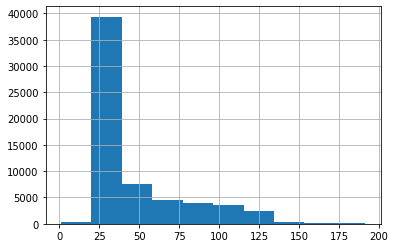

In [16]:
data5['MI_dir_L0.01_weight'].hist()

<AxesSubplot:>

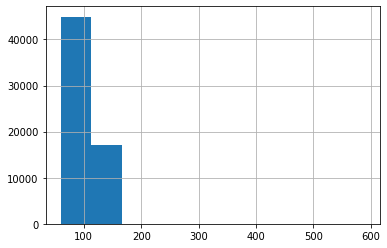

In [17]:
data5['MI_dir_L0.01_mean'].hist()

<AxesSubplot:>

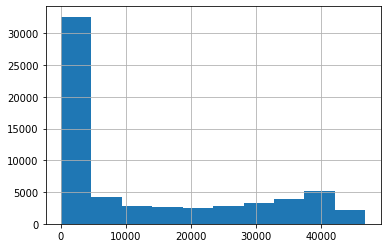

In [18]:
data5['MI_dir_L0.01_variance'].hist()

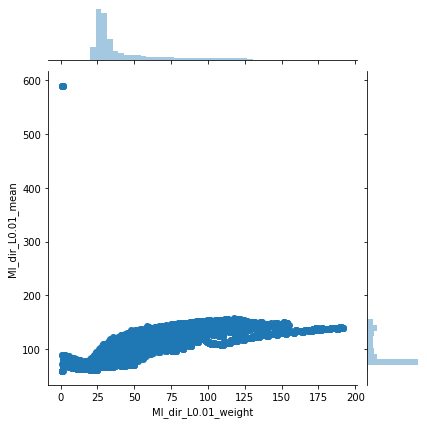

In [19]:
sns.jointplot(x="MI_dir_L0.01_weight", y="MI_dir_L0.01_mean", data=data5);

In [20]:
#Notamos que hay valores atipicos en "MI_dir_L0.01_mean". Vamos a contarlos para luego decidir si eliminar todos esos registros 
(data5["MI_dir_L0.01_mean"] > 200).value_counts()

False    62146
True         8
Name: MI_dir_L0.01_mean, dtype: int64

In [21]:
#Eliminamos los registros con "MI_dir_L0.01_mean" > 200
mask = (data5['MI_dir_L0.01_mean'] <= 200)
data5 = data5[mask]

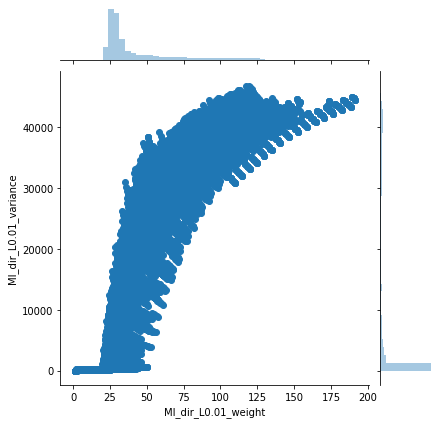

In [22]:
sns.jointplot(x="MI_dir_L0.01_weight", y="MI_dir_L0.01_variance", data=data5);
# Vemos que no hay valores atipicos en MI_dir_L0.01_variance 

<AxesSubplot:>

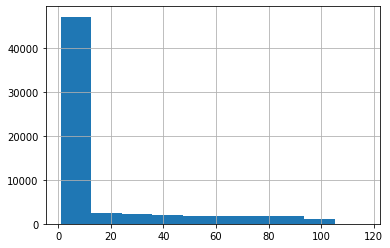

In [23]:
data5['MI_dir_L0.1_weight'].hist()


<AxesSubplot:>

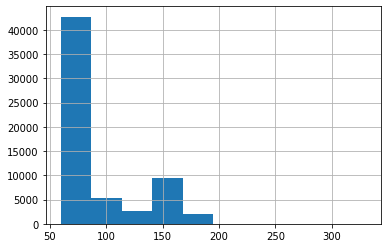

In [24]:
data5['MI_dir_L0.1_mean'].hist()


<AxesSubplot:>

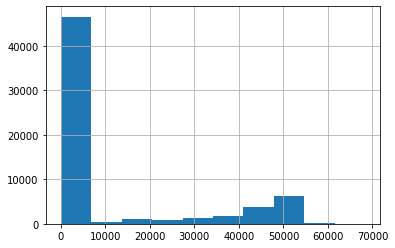

In [25]:
data5['MI_dir_L0.1_variance'].hist()

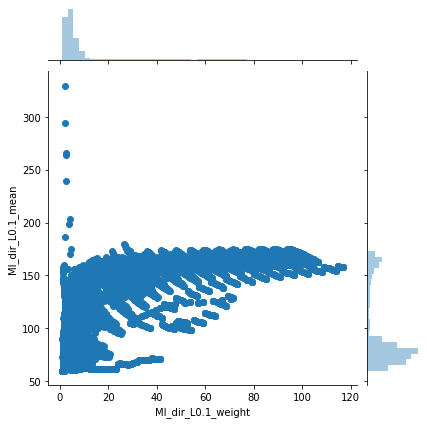

In [26]:
sns.jointplot(x="MI_dir_L0.1_weight", y="MI_dir_L0.1_mean", data=data5);

In [27]:
#Notamos que hay valores atipicos en "MI_dir_L0.1_mean". Vamos a contarlos para luego decidir si eliminar todos esos registros 
(data5["MI_dir_L0.1_mean"] > 175).value_counts()

False    62129
True        17
Name: MI_dir_L0.1_mean, dtype: int64

In [28]:
#Eliminamos los registros con "MI_dir_L0.01_mean" > 200
mask = (data5['MI_dir_L0.1_mean'] <= 175)
data5 = data5[mask]

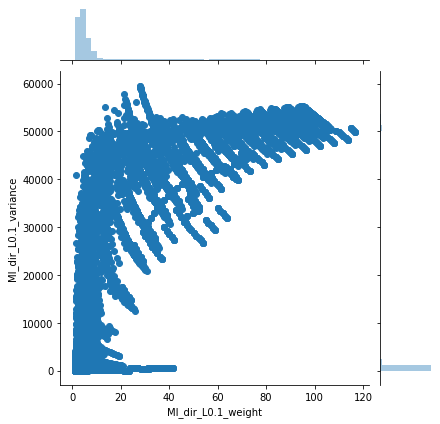

In [29]:
sns.jointplot(x="MI_dir_L0.1_weight", y="MI_dir_L0.1_variance", data=data5);
# Vemos que no hay valores atipicos en MI_dir_L0.01_variance 

<AxesSubplot:>

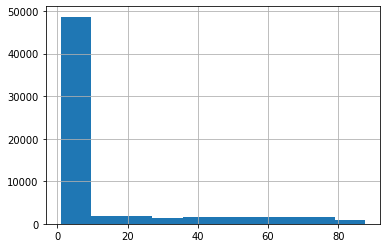

In [30]:
data5['MI_dir_L1_weight'].hist()

<AxesSubplot:>

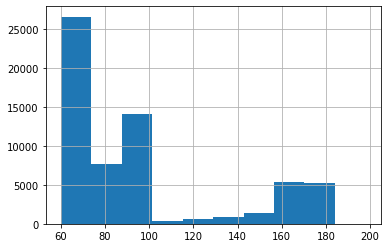

In [31]:
data5['MI_dir_L1_mean'].hist()

<AxesSubplot:>

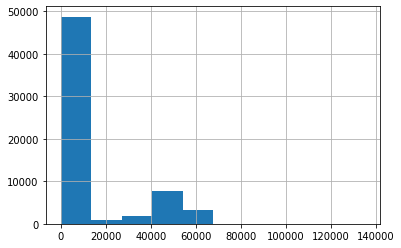

In [32]:
data5['MI_dir_L1_variance'].hist()

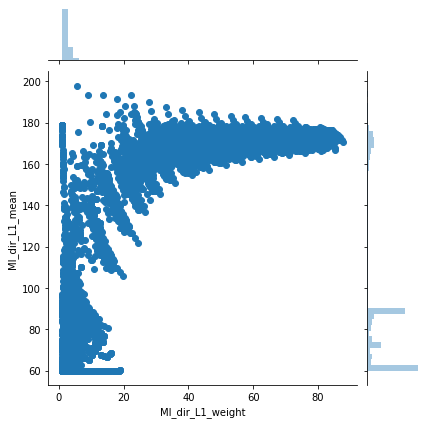

In [33]:
sns.jointplot(x="MI_dir_L1_weight", y="MI_dir_L1_mean", data=data5);

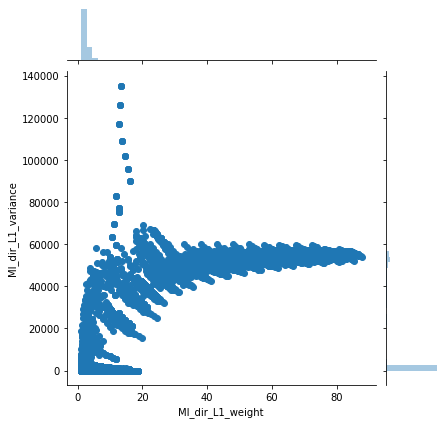

In [34]:
sns.jointplot(x="MI_dir_L1_weight", y="MI_dir_L1_variance", data=data5);

In [35]:
(data5["MI_dir_L1_variance"] > 70000).value_counts()


False    62089
True        40
Name: MI_dir_L1_variance, dtype: int64

In [36]:
# Creamos una mascara para ver los > 56000.
mask = (data5['MI_dir_L1_variance'] <= 70000)
data5 = data5[mask]

<AxesSubplot:>

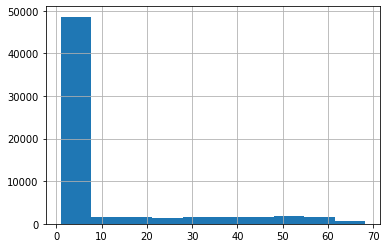

In [37]:
data5['MI_dir_L3_weight'].hist()

<AxesSubplot:>

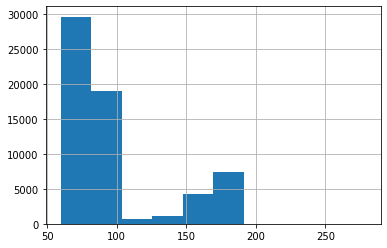

In [38]:
data5['MI_dir_L3_mean'].hist()

<AxesSubplot:>

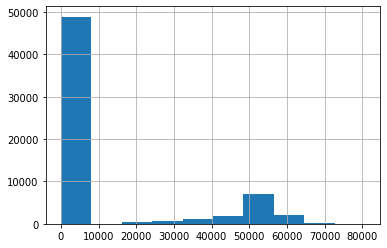

In [39]:
data5['MI_dir_L3_variance'].hist()

In [40]:
(data5["MI_dir_L3_variance"] < 0).value_counts()

False    62089
Name: MI_dir_L3_variance, dtype: int64

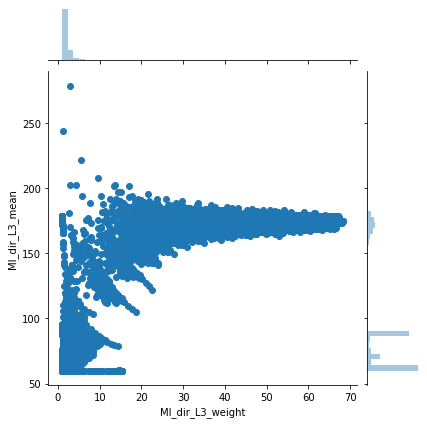

In [41]:
sns.jointplot(x="MI_dir_L3_weight", y="MI_dir_L3_mean", data=data5);

In [42]:
(data5["MI_dir_L3_mean"] > 200).value_counts()
#Buscamos valores < 0 en variance 
#(data5["MI_dir_L1_mean"] > 180).value_counts()

False    62080
True         9
Name: MI_dir_L3_mean, dtype: int64

In [43]:
# Creamos una mascara para ver los > 56000.
mask = (data5['MI_dir_L3_mean'] <= 200)
data5 = data5[mask]

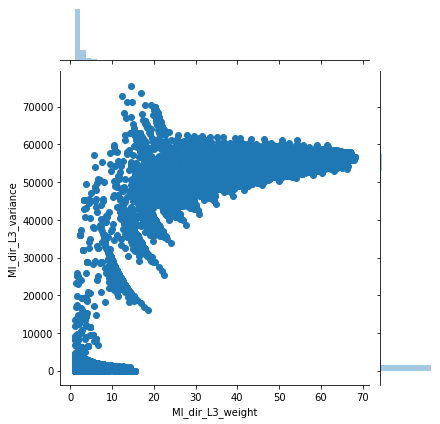

In [44]:
sns.jointplot(x="MI_dir_L3_weight", y="MI_dir_L3_variance", data=data5);

<AxesSubplot:>

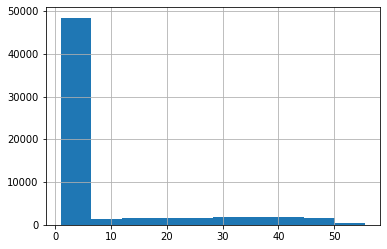

In [45]:
data5['MI_dir_L5_weight'].hist()

<AxesSubplot:>

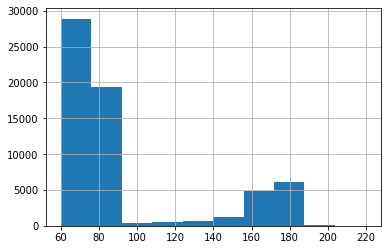

In [46]:
data5['MI_dir_L5_mean'].hist()

<AxesSubplot:>

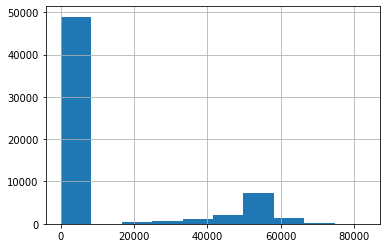

In [47]:
data5['MI_dir_L5_variance'].hist()

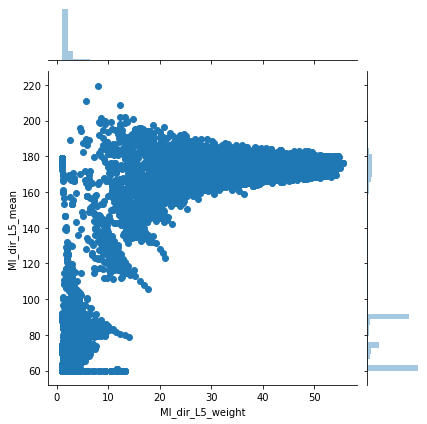

In [48]:
sns.jointplot(x="MI_dir_L5_weight", y="MI_dir_L5_mean", data=data5);

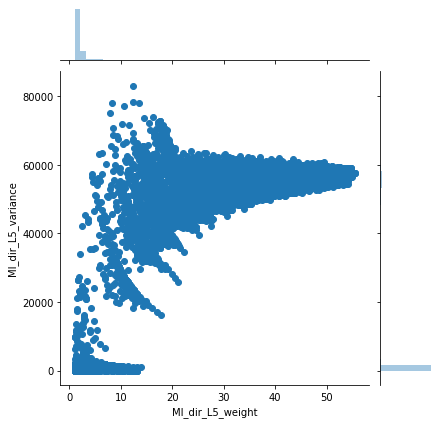

In [49]:
sns.jointplot(x="MI_dir_L5_weight", y="MI_dir_L5_variance", data=data5);

In [50]:
data5.shape

(62080, 115)

# Vamos a revisar los datos SOURCE-IP con su media y varianza para cada una de las 5 ventanas de tiempo

<AxesSubplot:>

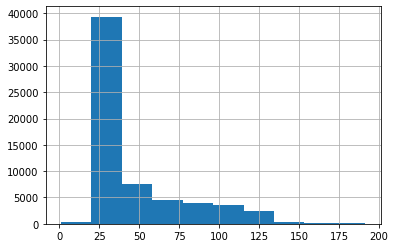

In [51]:
data5['H_L0.01_weight'].hist()

<AxesSubplot:>

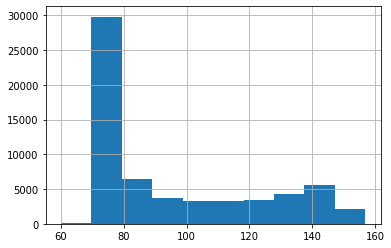

In [52]:
data5['H_L0.01_mean'].hist()

<AxesSubplot:>

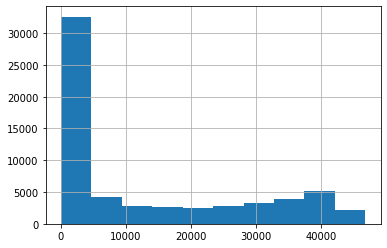

In [53]:
data5['H_L0.01_variance'].hist()

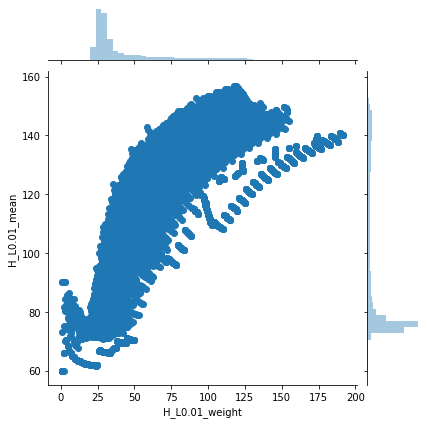

In [54]:
sns.jointplot(x="H_L0.01_weight", y="H_L0.01_mean", data=data5);

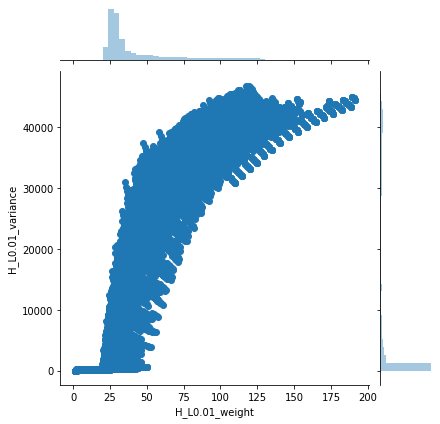

In [55]:
sns.jointplot(x="H_L0.01_weight", y="H_L0.01_variance", data=data5);

<AxesSubplot:>

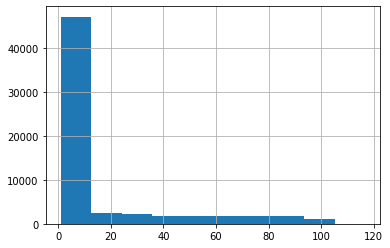

In [56]:
data5['H_L0.1_weight'].hist()

<AxesSubplot:>

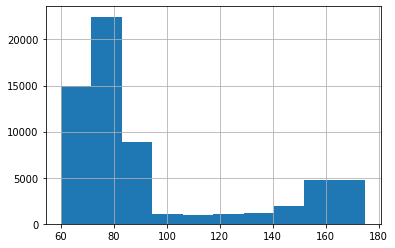

In [57]:
data5['H_L0.1_mean'].hist()

<AxesSubplot:>

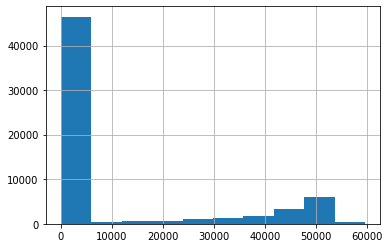

In [58]:
data5['H_L0.1_variance'].hist()

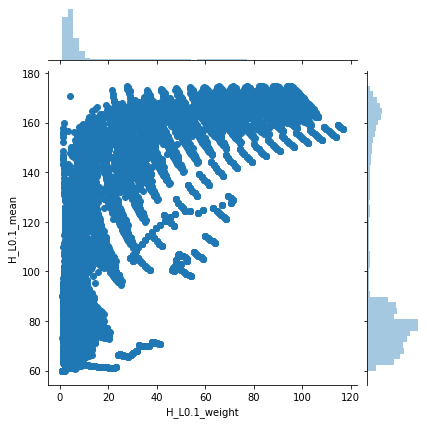

In [59]:
sns.jointplot(x="H_L0.1_weight", y="H_L0.1_mean", data=data5);

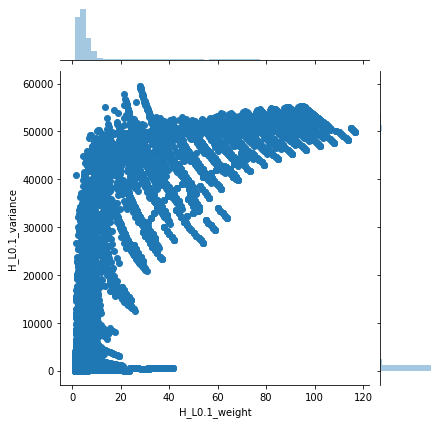

In [60]:
sns.jointplot(x="H_L0.1_weight", y="H_L0.1_variance", data=data5);

<AxesSubplot:>

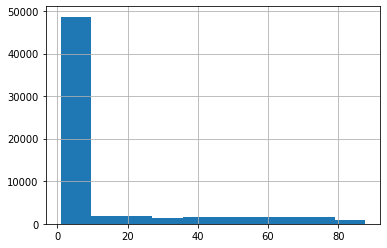

In [61]:
data5['H_L1_weight'].hist()

<AxesSubplot:>

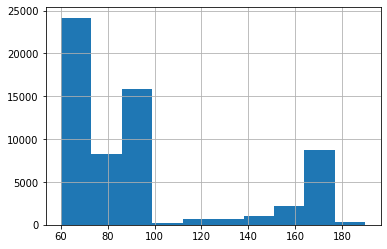

In [62]:
data5['H_L1_mean'].hist()

<AxesSubplot:>

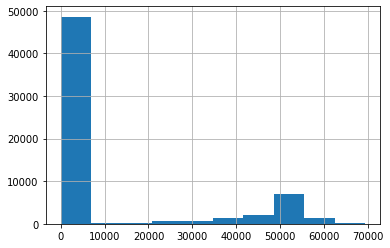

In [63]:
data5['H_L1_variance'].hist()

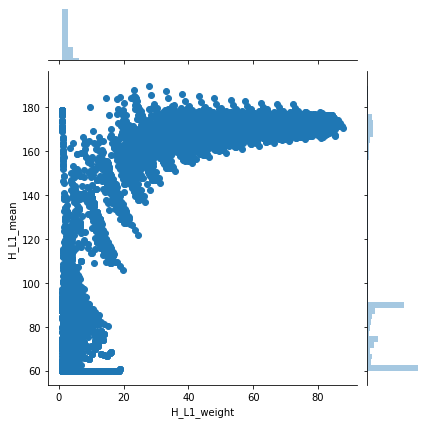

In [64]:
sns.jointplot(x="H_L1_weight", y="H_L1_mean", data=data5);

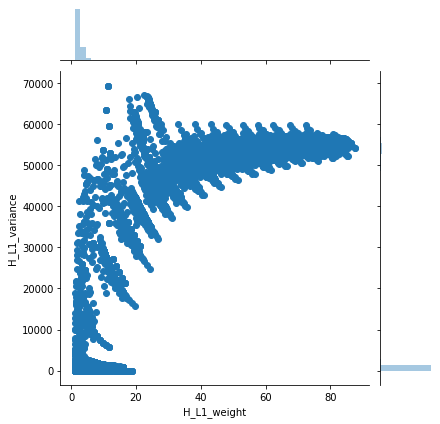

In [65]:
sns.jointplot(x="H_L1_weight", y="H_L1_variance", data=data5);

<AxesSubplot:>

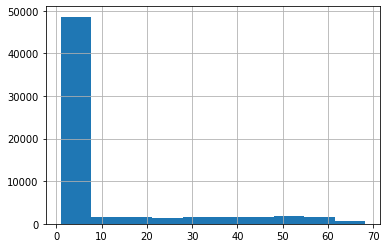

In [66]:
data5['H_L3_weight'].hist()

<AxesSubplot:>

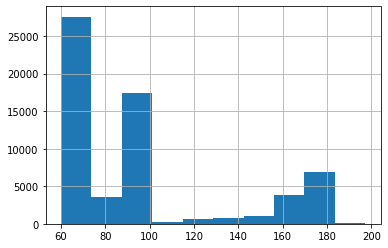

In [67]:
data5['H_L3_mean'].hist()

<AxesSubplot:>

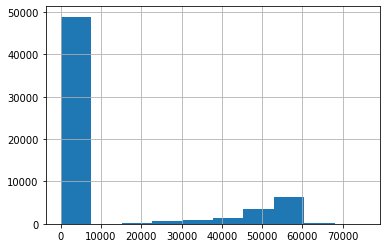

In [68]:
data5['H_L3_variance'].hist()

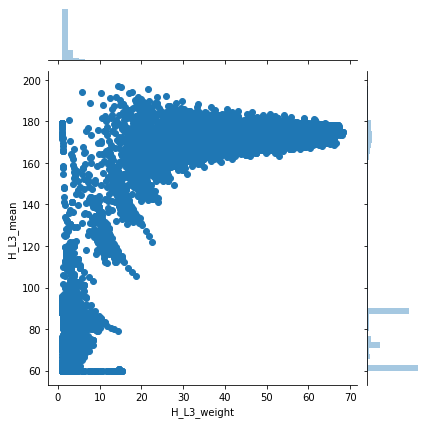

In [69]:
sns.jointplot(x="H_L3_weight", y="H_L3_mean", data=data5);

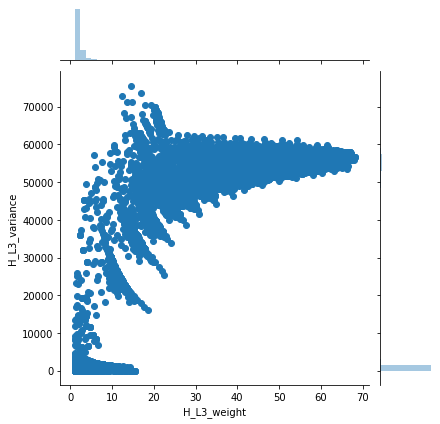

In [70]:
sns.jointplot(x="H_L3_weight", y="H_L3_variance", data=data5);

<AxesSubplot:>

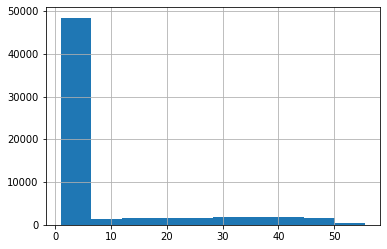

In [71]:
data5['H_L5_weight'].hist()

<AxesSubplot:>

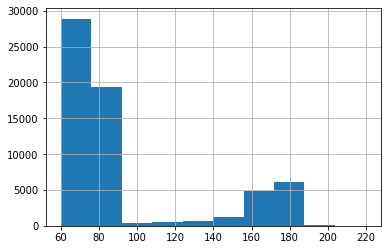

In [72]:
data5['H_L5_mean'].hist()

<AxesSubplot:>

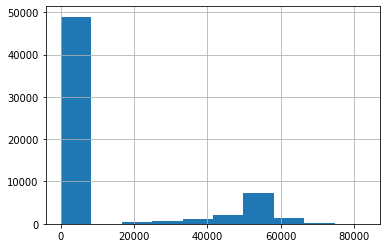

In [73]:
data5['H_L5_variance'].hist()

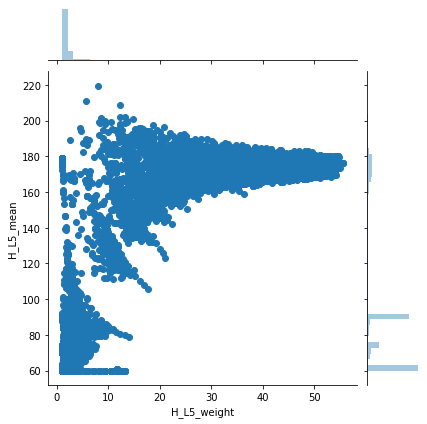

In [74]:
sns.jointplot(x="H_L5_weight", y="H_L5_mean", data=data5);

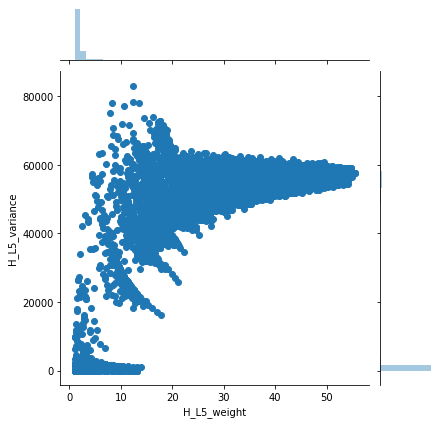

In [75]:
sns.jointplot(x="H_L5_weight", y="H_L5_variance", data=data5);

# Vamos a revisar los datos Chanel HH con su mean, std, magnitude, radius, covariance y pcc para cada una de las 5 ventanas de tiempo

# HH_L0.01

<AxesSubplot:>

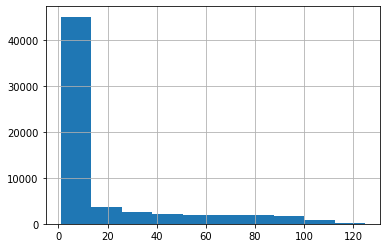

In [76]:
data5['HH_L0.01_weight'].hist()

<AxesSubplot:>

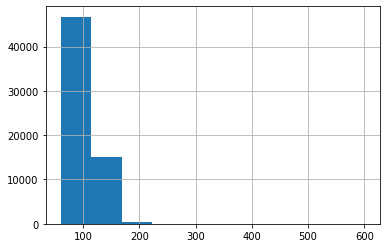

In [77]:
data5['HH_L0.01_mean'].hist()

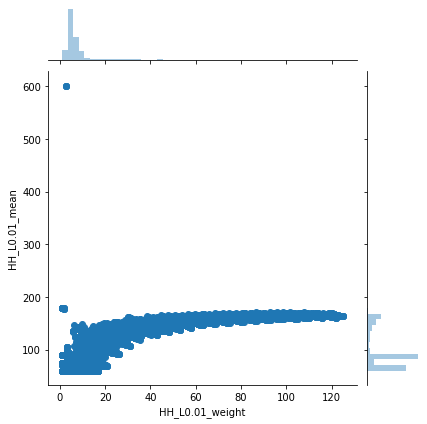

In [78]:
sns.jointplot(x="HH_L0.01_weight", y="HH_L0.01_mean", data=data5);

In [79]:
(data5["HH_L0.01_mean"] > 175).value_counts()
#Buscamos valores < 0 en variance 
#(data5["MI_dir_L1_mean"] > 180).value_counts()

False    61898
True       182
Name: HH_L0.01_mean, dtype: int64

In [80]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_L0.01_mean'] <= 175)
data5 = data5[mask]

<AxesSubplot:>

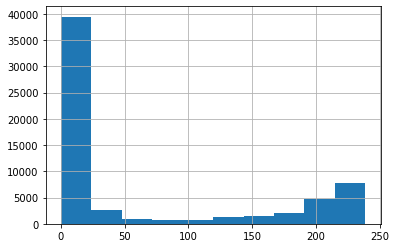

In [81]:
data5['HH_L0.01_std'].hist()

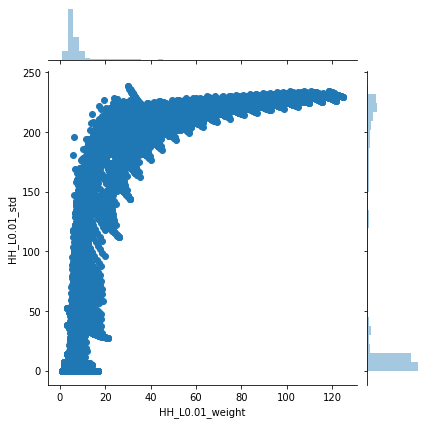

In [82]:
sns.jointplot(x="HH_L0.01_weight", y="HH_L0.01_std", data=data5);

<AxesSubplot:>

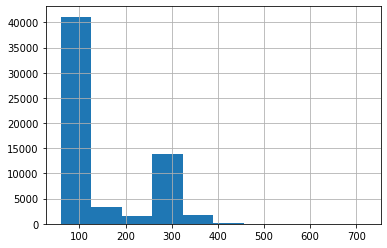

In [83]:
data5['HH_L0.01_magnitude'].hist()

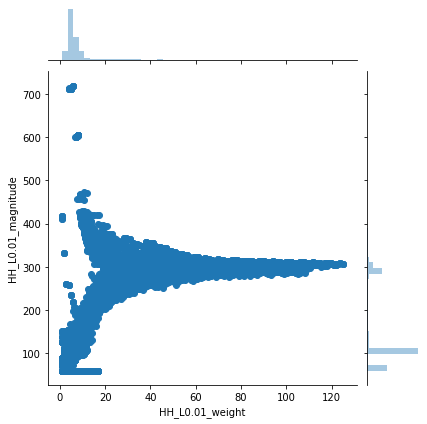

In [84]:
sns.jointplot(x="HH_L0.01_weight", y="HH_L0.01_magnitude", data=data5);

In [85]:
(data5["HH_L0.01_magnitude"] > 450).value_counts()

False    61843
True        55
Name: HH_L0.01_magnitude, dtype: int64

In [86]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_L0.01_magnitude'] <= 450)
data5 = data5[mask]

<AxesSubplot:>

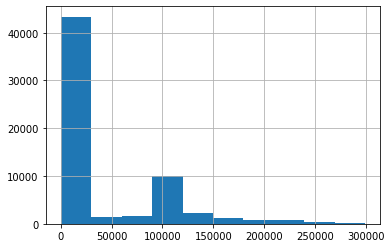

In [87]:
data5['HH_L0.01_radius'].hist()

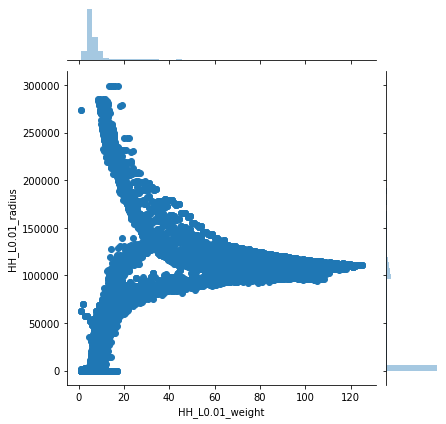

In [88]:
sns.jointplot(x="HH_L0.01_weight", y="HH_L0.01_radius", data=data5);

<AxesSubplot:>

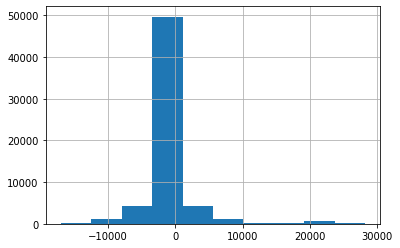

In [89]:
data5['HH_L0.01_covariance'].hist()

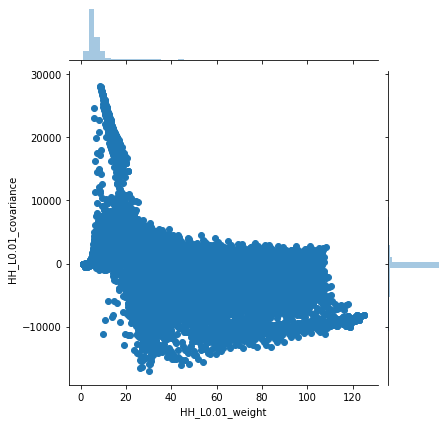

In [90]:
sns.jointplot(x="HH_L0.01_weight", y="HH_L0.01_covariance", data=data5);

<AxesSubplot:>

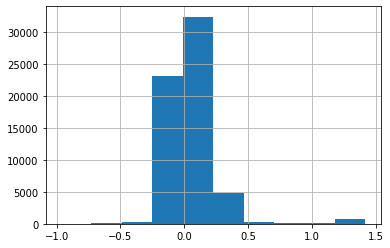

In [91]:
data5['HH_L0.01_pcc'].hist()

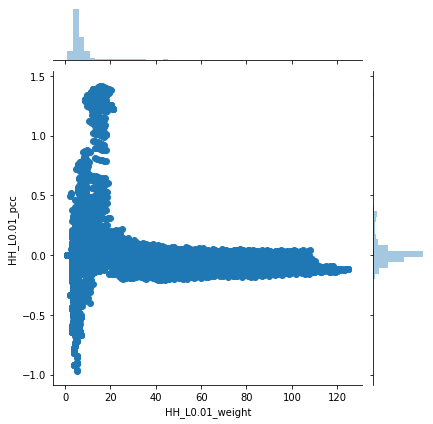

In [92]:
sns.jointplot(x="HH_L0.01_weight", y="HH_L0.01_pcc", data=data5);

# HH_L0.1

<AxesSubplot:>

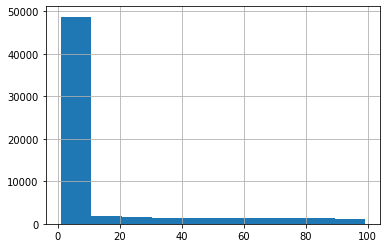

In [93]:
data5['HH_L0.1_weight'].hist()

<AxesSubplot:>

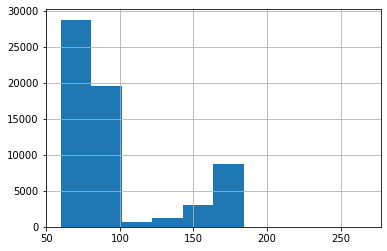

In [94]:
data5['HH_L0.1_mean'].hist()

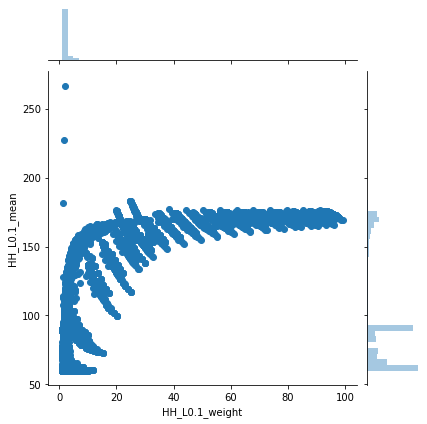

In [95]:
sns.jointplot(x="HH_L0.1_weight", y="HH_L0.1_mean", data=data5);

In [96]:
(data5["HH_L0.1_mean"] > 180).value_counts()

False    61829
True        14
Name: HH_L0.1_mean, dtype: int64

In [97]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_L0.1_mean'] <= 180)
data5 = data5[mask]

<AxesSubplot:>

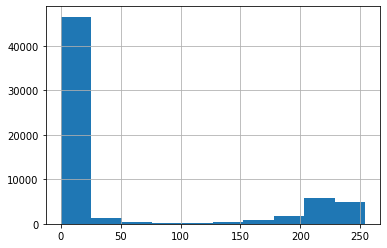

In [98]:
data5['HH_L0.1_std'].hist()



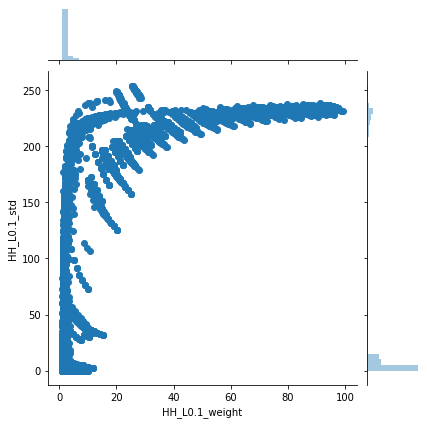

In [99]:
sns.jointplot(x="HH_L0.1_weight", y="HH_L0.1_std", data=data5);

<AxesSubplot:>

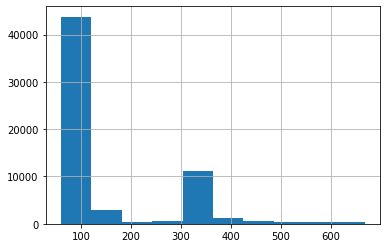

In [100]:
data5['HH_L0.1_magnitude'].hist()



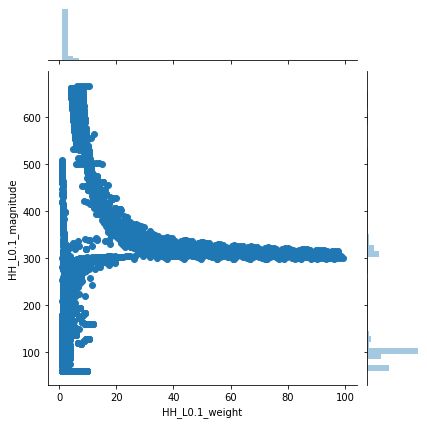

In [101]:
sns.jointplot(x="HH_L0.1_weight", y="HH_L0.1_magnitude", data=data5);

<AxesSubplot:>

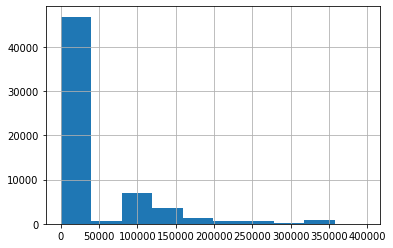

In [102]:
data5['HH_L0.1_radius'].hist()



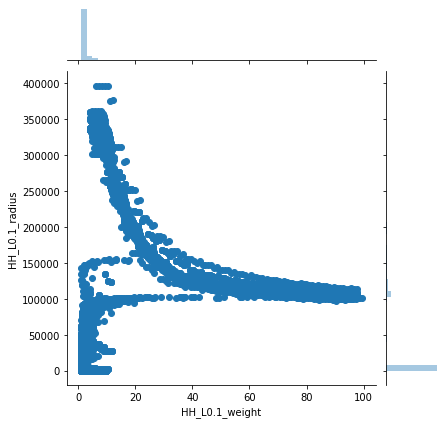

In [103]:
sns.jointplot(x="HH_L0.1_weight", y="HH_L0.1_radius", data=data5);

<AxesSubplot:>

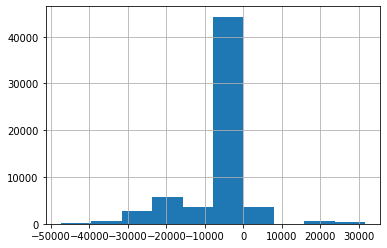

In [104]:
data5['HH_L0.1_covariance'].hist()

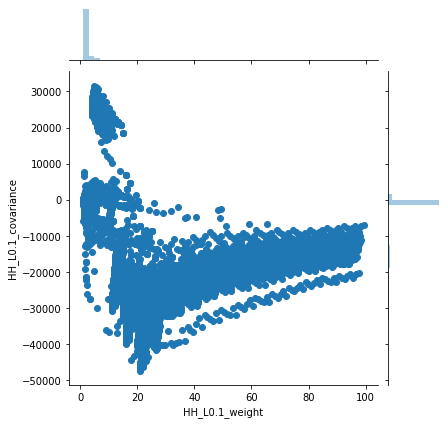

In [105]:
sns.jointplot(x="HH_L0.1_weight", y="HH_L0.1_covariance", data=data5);

In [106]:
(data5["HH_L0.1_covariance"] < 0).value_counts() # Dejamos pendiente para remplazar ej. remplazar por la media.

True     36947
False    24882
Name: HH_L0.1_covariance, dtype: int64

<AxesSubplot:>

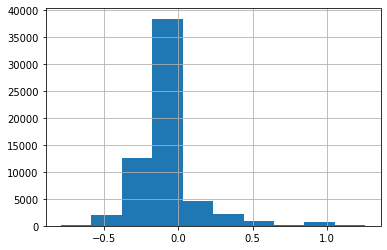

In [107]:
data5['HH_L0.1_pcc'].hist()

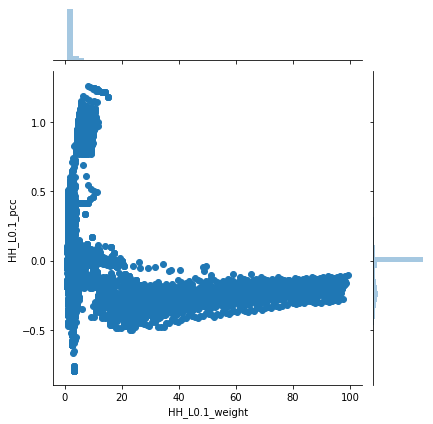

In [108]:
sns.jointplot(x = "HH_L0.1_weight", y = "HH_L0.1_pcc", data = data5);

# HH_L1

<AxesSubplot:>

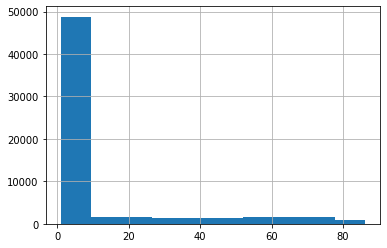

In [109]:
data5['HH_L1_weight'].hist()


<AxesSubplot:>

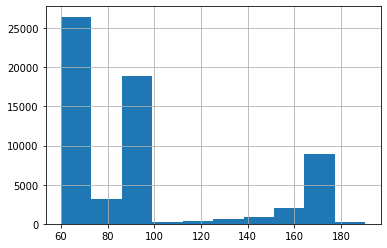

In [110]:
data5['HH_L1_mean'].hist()


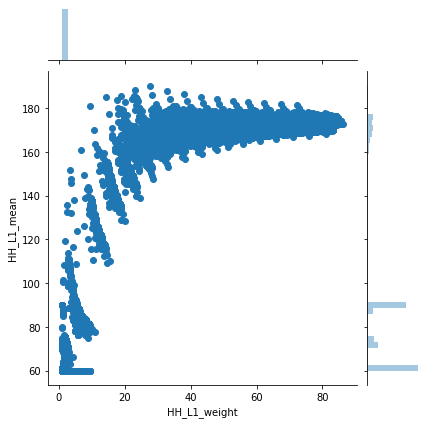

In [111]:
sns.jointplot(x = "HH_L1_weight", y = "HH_L1_mean", data = data5);

<AxesSubplot:>

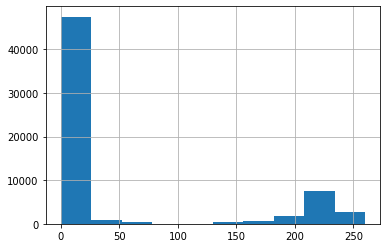

In [112]:
data5['HH_L1_std'].hist()


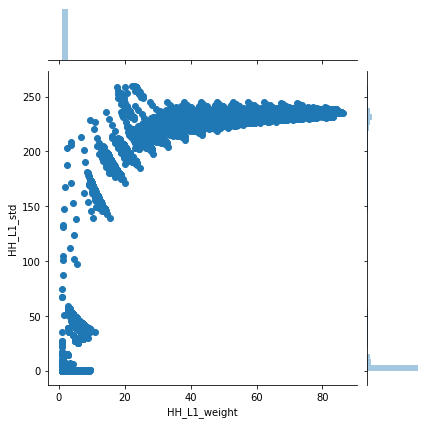

In [113]:
sns.jointplot(x = "HH_L1_weight", y = "HH_L1_std", data = data5);

<AxesSubplot:>

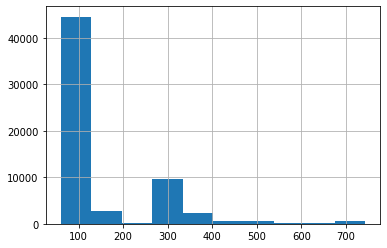

In [114]:
data5['HH_L1_magnitude'].hist()


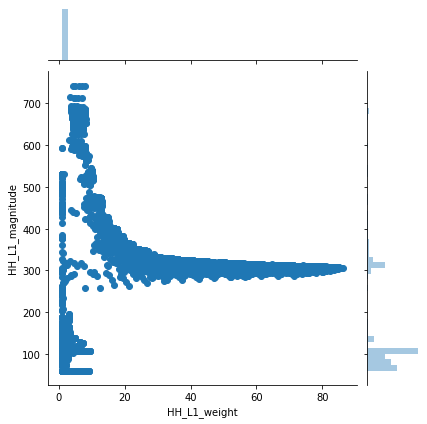

In [115]:
sns.jointplot(x = "HH_L1_weight", y = "HH_L1_magnitude", data = data5);

<AxesSubplot:>

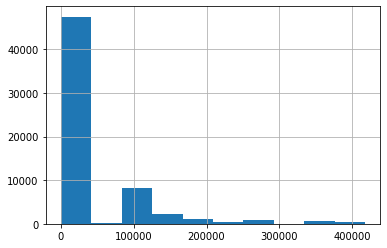

In [116]:
data5['HH_L1_radius'].hist()


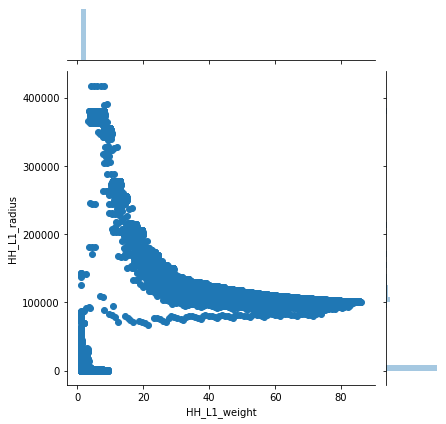

In [117]:
sns.jointplot(x = "HH_L1_weight", y = "HH_L1_radius", data = data5);

<AxesSubplot:>

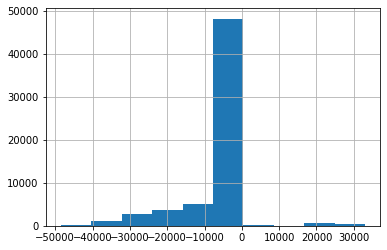

In [118]:
data5['HH_L1_covariance'].hist()


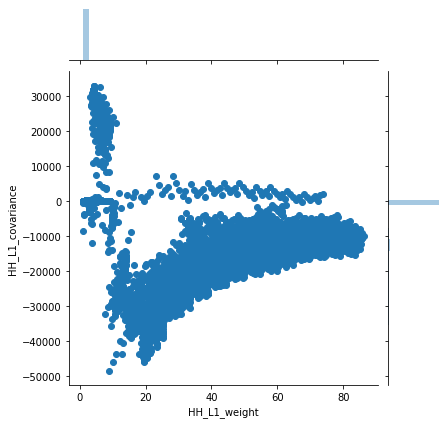

In [119]:
sns.jointplot(x = "HH_L1_weight", y = "HH_L1_covariance", data = data5);

<AxesSubplot:>

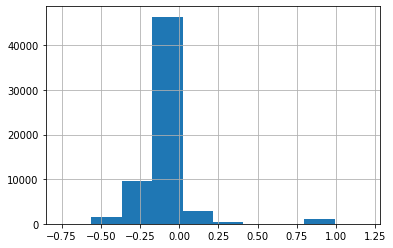

In [120]:
data5['HH_L1_pcc'].hist()

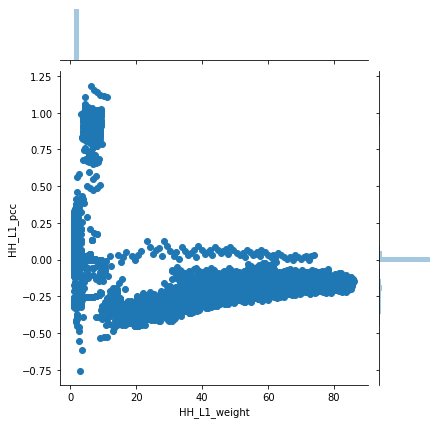

In [121]:
sns.jointplot(x = "HH_L1_weight", y = "HH_L1_pcc", data = data5);

# HH_L3

<AxesSubplot:>

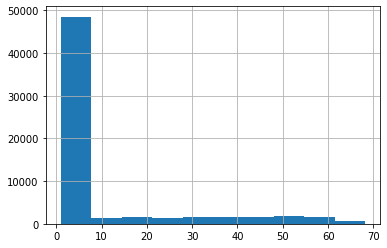

In [122]:
data5['HH_L3_weight'].hist()


<AxesSubplot:>

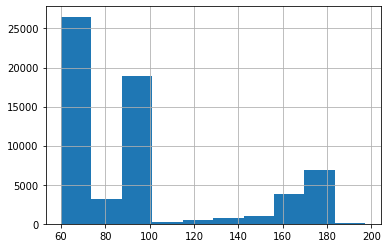

In [123]:
data5['HH_L3_mean'].hist()

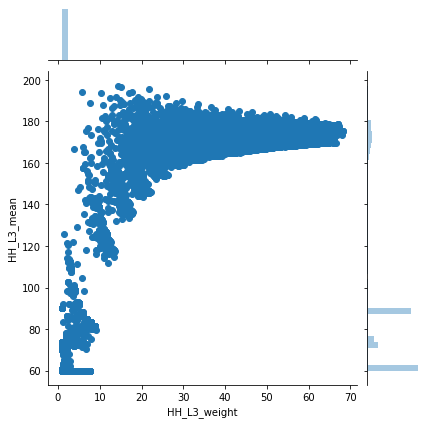

In [124]:
sns.jointplot(x = "HH_L3_weight", y = "HH_L3_mean", data = data5);

<AxesSubplot:>

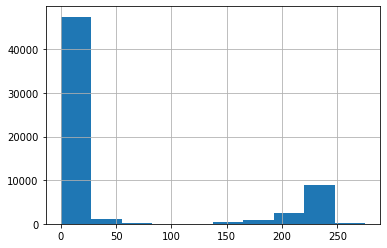

In [125]:
data5['HH_L3_std'].hist()

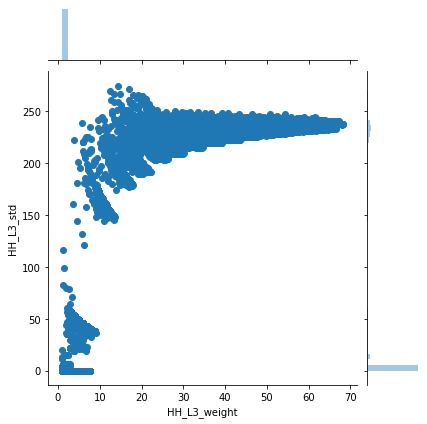

In [126]:
sns.jointplot(x = "HH_L3_weight", y = "HH_L3_std", data = data5);

<AxesSubplot:>

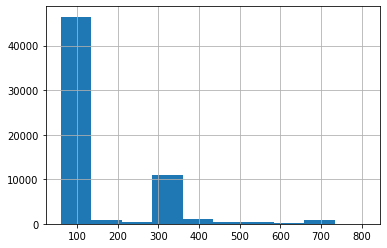

In [127]:
data5['HH_L3_magnitude'].hist()

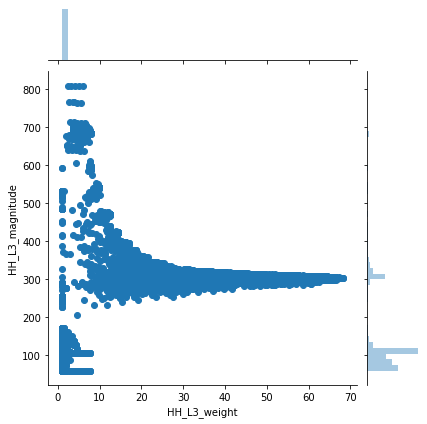

In [128]:
sns.jointplot(x = "HH_L3_weight", y = "HH_L3_magnitude", data = data5);

<AxesSubplot:>

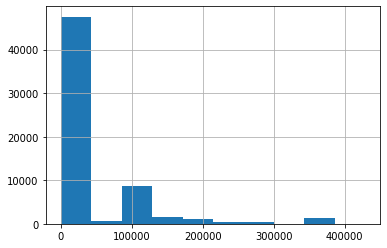

In [129]:
data5['HH_L3_radius'].hist()

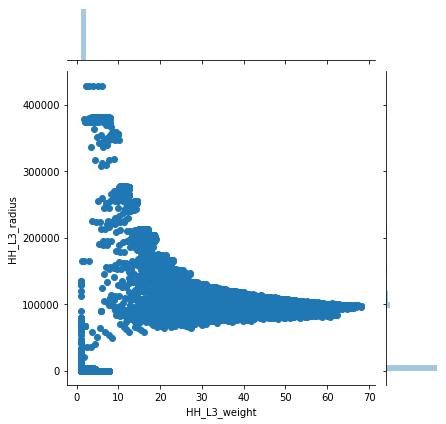

In [130]:
sns.jointplot(x = "HH_L3_weight", y = "HH_L3_radius", data = data5);

<AxesSubplot:>

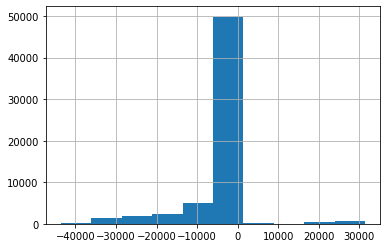

In [131]:
data5['HH_L3_covariance'].hist()

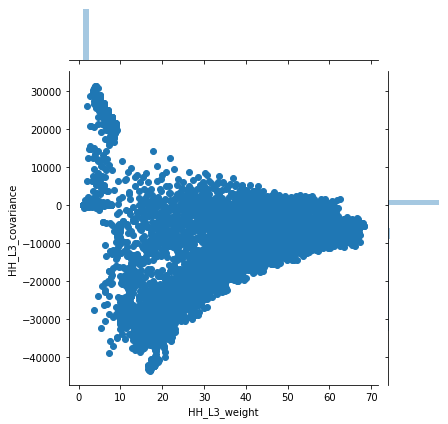

In [132]:
sns.jointplot(x = "HH_L3_weight", y = "HH_L3_covariance", data = data5);

<AxesSubplot:>

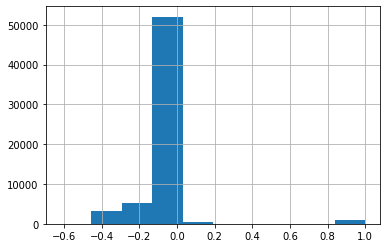

In [133]:
data5['HH_L3_pcc'].hist()

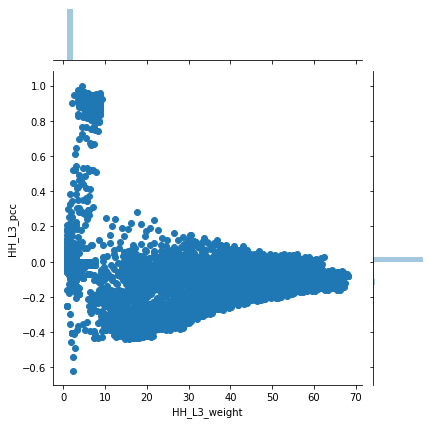

In [134]:
sns.jointplot(x = "HH_L3_weight", y = "HH_L3_pcc", data = data5);

# HH_L5

<AxesSubplot:>

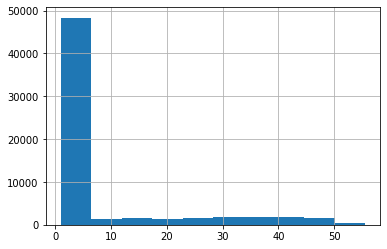

In [135]:
data5['HH_L5_weight'].hist()

<AxesSubplot:>

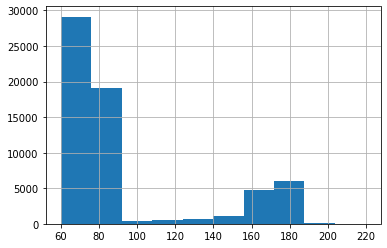

In [136]:
data5['HH_L5_mean'].hist()

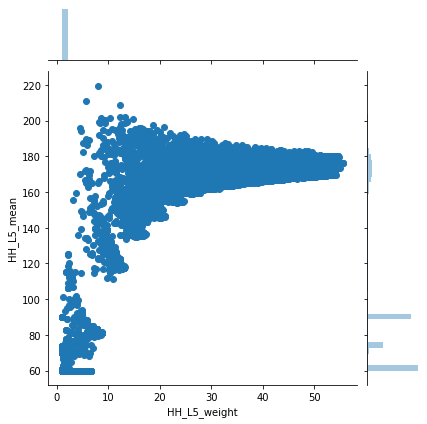

In [137]:
sns.jointplot(x = "HH_L5_weight", y = "HH_L5_mean", data = data5);

<AxesSubplot:>

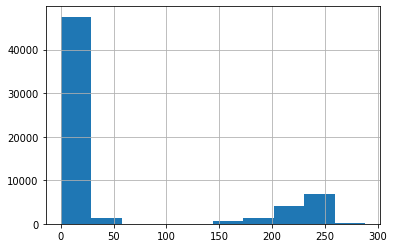

In [138]:
data5['HH_L5_std'].hist()

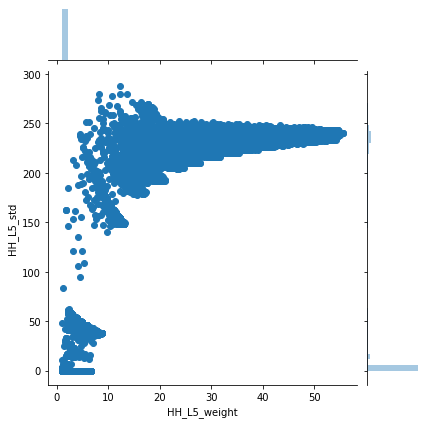

In [139]:
sns.jointplot(x = "HH_L5_weight", y = "HH_L5_std", data = data5);

<AxesSubplot:>

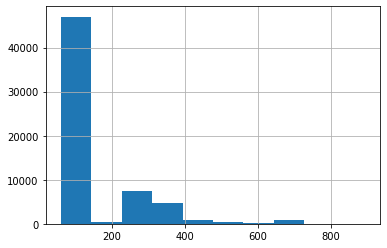

In [140]:
data5['HH_L5_magnitude'].hist()

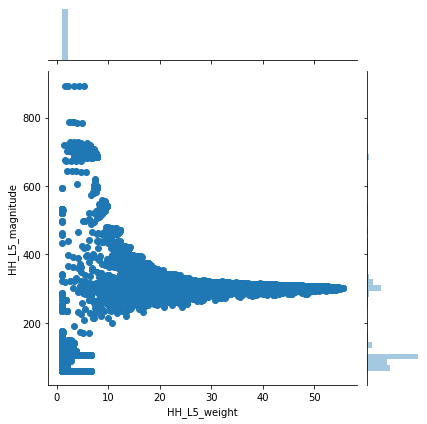

In [141]:
sns.jointplot(x = "HH_L5_weight", y = "HH_L5_magnitude", data = data5);

<AxesSubplot:>

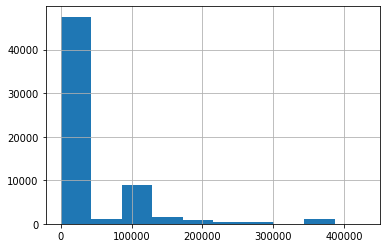

In [142]:
data5['HH_L5_radius'].hist()

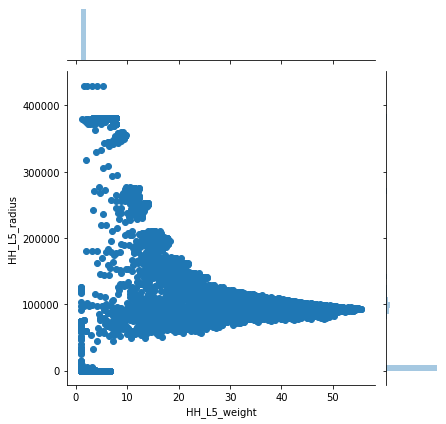

In [143]:
sns.jointplot(x = "HH_L5_weight", y = "HH_L5_radius", data = data5);

<AxesSubplot:>

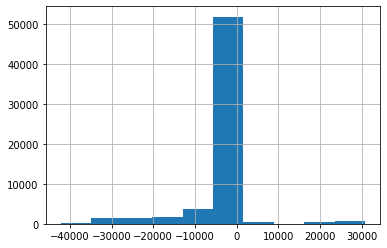

In [144]:
data5['HH_L5_covariance'].hist()

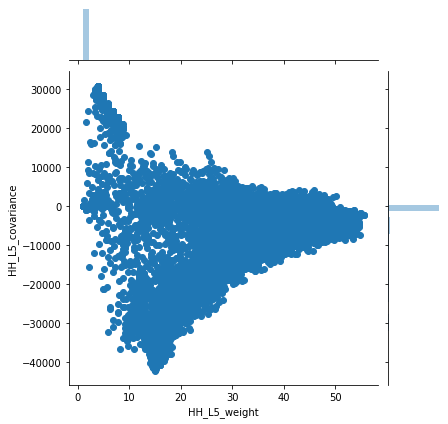

In [145]:
sns.jointplot(x = "HH_L5_weight", y = "HH_L5_covariance", data = data5);

<AxesSubplot:>

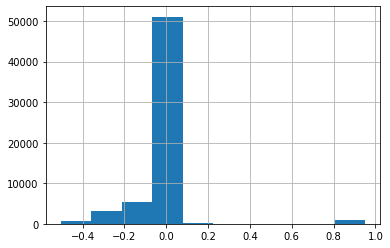

In [146]:
data5['HH_L5_pcc'].hist()

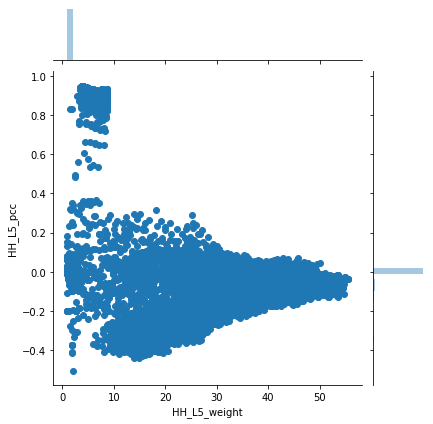

In [147]:
sns.jointplot(x = "HH_L5_weight", y = "HH_L5_pcc", data = data5);

# Vamos a revisar los datos Chanel HHjit con su mean, variance y number(weight) para cada una de las 5 ventanas de tiempo

# HH_jit_L0.01

<AxesSubplot:>

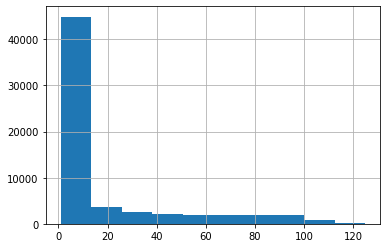

In [148]:
data5['HH_jit_L0.01_weight'].hist()

<AxesSubplot:>

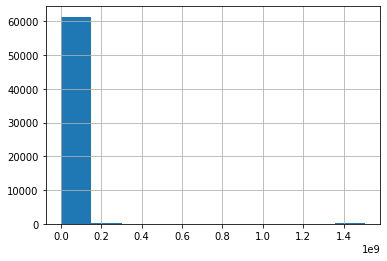

In [149]:
data5['HH_jit_L0.01_mean'].hist()

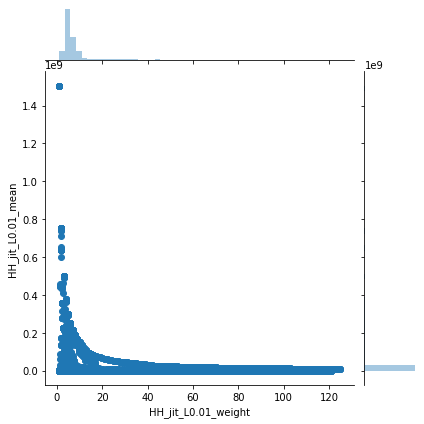

In [150]:
sns.jointplot(x = "HH_jit_L0.01_weight", y = "HH_jit_L0.01_mean", data = data5);

In [151]:
(data5["HH_jit_L0.01_mean"] > 0.8e9).value_counts()

False    61724
True       105
Name: HH_jit_L0.01_mean, dtype: int64

In [152]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_jit_L0.01_mean'] <= 0.8e9)
data5 = data5[mask]

<AxesSubplot:>

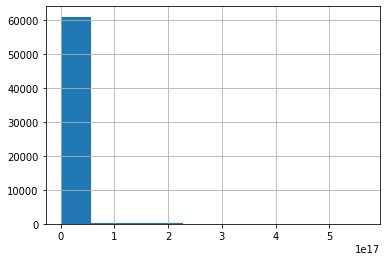

In [153]:
data5['HH_jit_L0.01_variance'].hist()

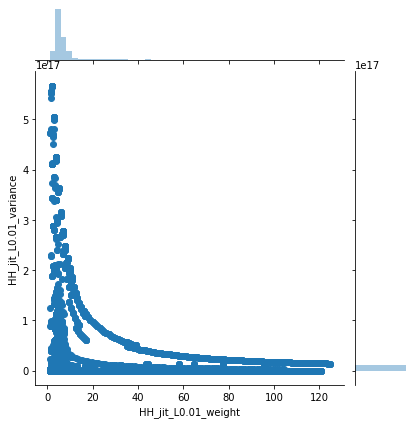

In [154]:
sns.jointplot(x = "HH_jit_L0.01_weight", y = "HH_jit_L0.01_variance", data = data5);

In [155]:
(data5["HH_jit_L0.01_variance"] > 2.4e17).value_counts()

False    61415
True       309
Name: HH_jit_L0.01_variance, dtype: int64

In [156]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_jit_L0.01_variance'] <= 2.4e17)
data5 = data5[mask]

# HH_jit_L0.1

<AxesSubplot:>

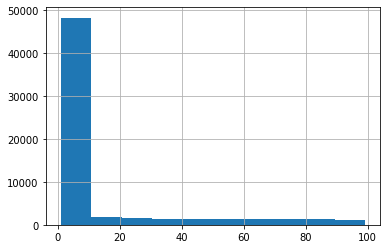

In [157]:
data5['HH_jit_L0.1_weight'].hist()

<AxesSubplot:>

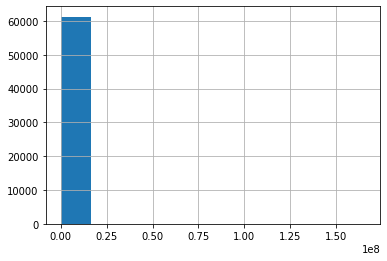

In [158]:
data5['HH_jit_L0.1_mean'].hist()

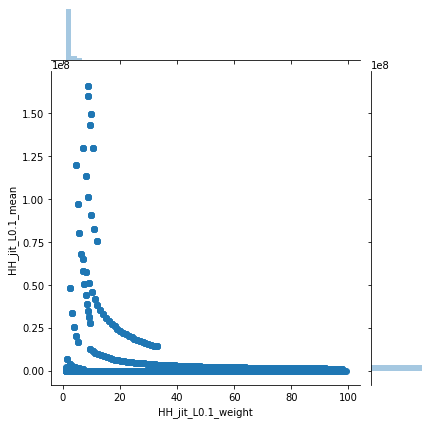

In [159]:
sns.jointplot(x = "HH_jit_L0.1_weight", y = "HH_jit_L0.1_mean", data = data5);

In [160]:
(data5['HH_jit_L0.1_mean'] > 0.25e8).value_counts()

False    61267
True       148
Name: HH_jit_L0.1_mean, dtype: int64

In [161]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_jit_L0.1_mean'] <= 0.25e8)
data5 = data5[mask]

<AxesSubplot:>

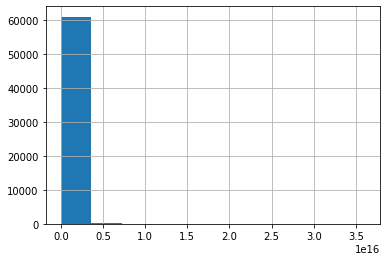

In [162]:
data5['HH_jit_L0.1_variance'].hist()

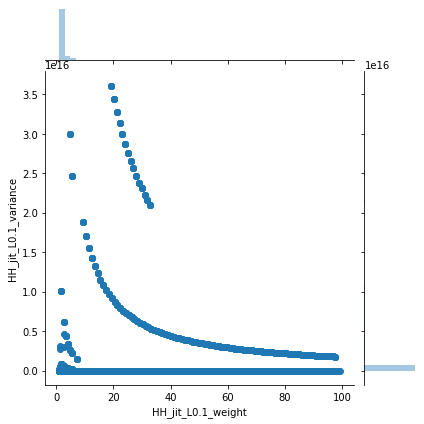

In [163]:
sns.jointplot(x = "HH_jit_L0.1_weight", y = "HH_jit_L0.1_variance", data = data5);

In [164]:
(data5["HH_jit_L0.1_variance"] > 2e16).value_counts()

False    61199
True        68
Name: HH_jit_L0.1_variance, dtype: int64

In [165]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_jit_L0.1_variance'] <= 2e16)
data5 = data5[mask]

# HH_jit_L1

<AxesSubplot:>

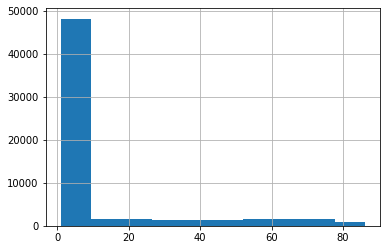

In [166]:
data5['HH_jit_L1_weight'].hist()

<AxesSubplot:>

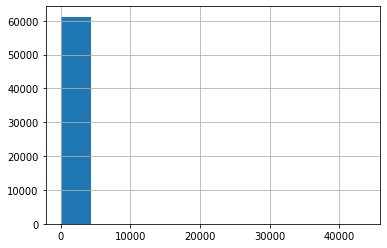

In [167]:
data5['HH_jit_L1_mean'].hist()

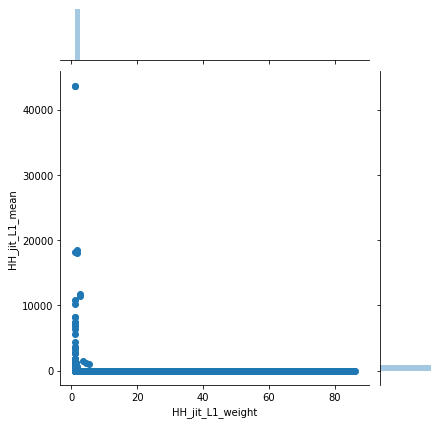

In [168]:
sns.jointplot(x = "HH_jit_L1_weight", y = "HH_jit_L1_mean", data = data5);

In [169]:
(data5["HH_jit_L1_mean"] > 2000).value_counts()

False    61171
True        28
Name: HH_jit_L1_mean, dtype: int64

In [170]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_jit_L1_mean'] <= 2000)
data5 = data5[mask]

<AxesSubplot:>

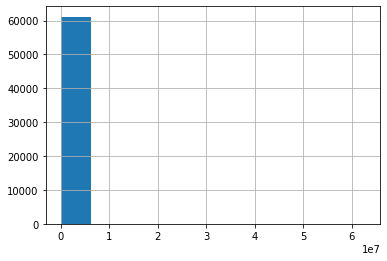

In [171]:
data5['HH_jit_L1_variance'].hist()

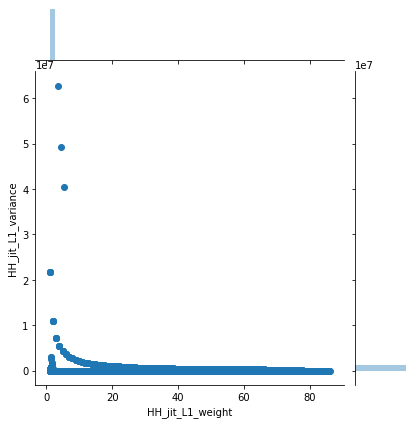

In [172]:
sns.jointplot(x = "HH_jit_L1_weight", y = "HH_jit_L1_variance", data = data5);

In [173]:
(data5["HH_jit_L1_variance"] > 1e7).value_counts()

False    61160
True        11
Name: HH_jit_L1_variance, dtype: int64

In [174]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_jit_L1_variance'] <= 1e7)
data5 = data5[mask]

# HH_jit_L3

<AxesSubplot:>

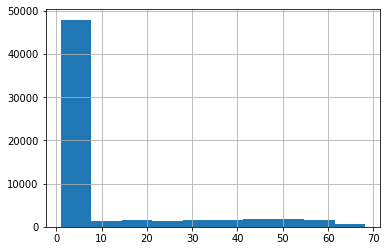

In [175]:
data5['HH_jit_L3_weight'].hist()

<AxesSubplot:>

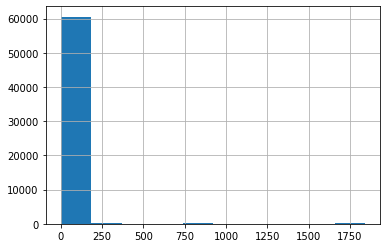

In [176]:
data5['HH_jit_L3_mean'].hist()

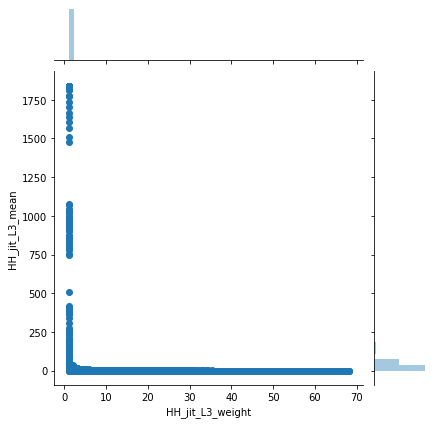

In [177]:
sns.jointplot(x = "HH_jit_L3_weight", y = "HH_jit_L3_mean", data = data5);

<AxesSubplot:>

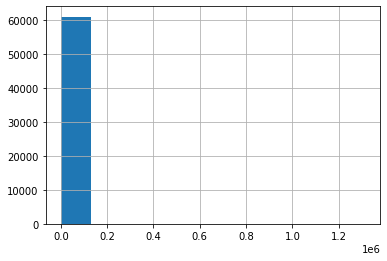

In [178]:
data5['HH_jit_L3_variance'].hist()

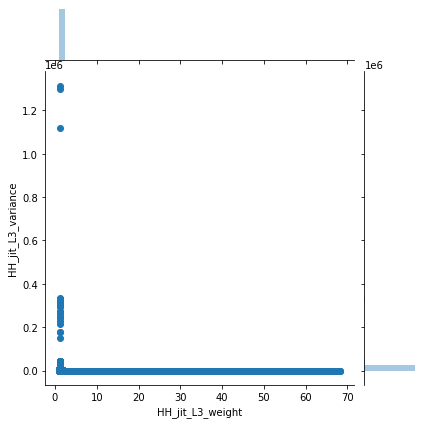

In [179]:
sns.jointplot(x = "HH_jit_L3_weight", y = "HH_jit_L3_variance", data = data5);

In [180]:
(data5["HH_jit_L3_variance"] > 0.4e6).value_counts()

False    61157
True         3
Name: HH_jit_L3_variance, dtype: int64

In [181]:
# Creamos una mascara para ver los > 56000.
mask = (data5['HH_jit_L3_variance'] <= 0.4e6)
data5 = data5[mask]

<AxesSubplot:>

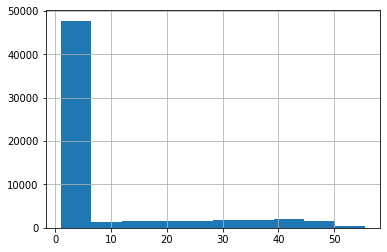

In [182]:
data5['HH_jit_L5_weight'].hist()

<AxesSubplot:>

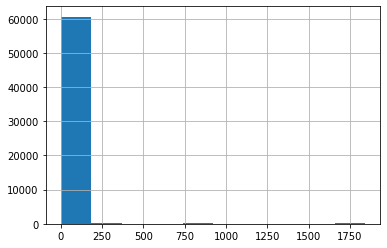

In [183]:
data5['HH_jit_L5_mean'].hist()

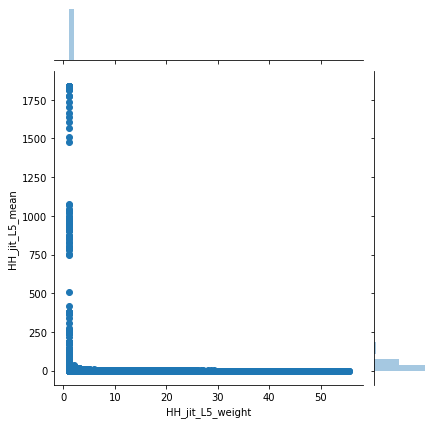

In [184]:
sns.jointplot(x = "HH_jit_L5_weight", y = "HH_jit_L5_mean", data = data5)

<AxesSubplot:>

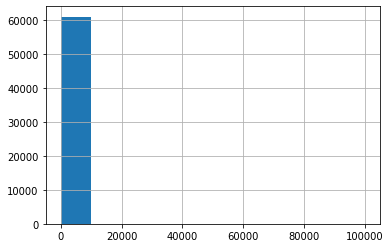

In [185]:
data5['HH_jit_L5_variance'].hist()

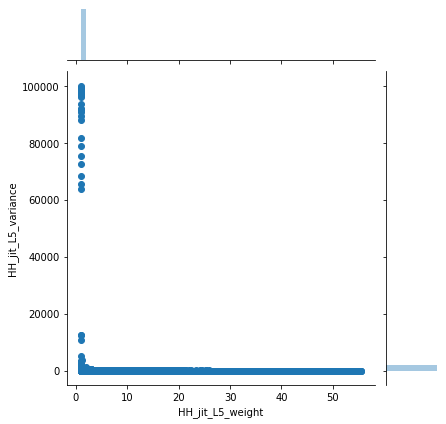

In [186]:
sns.jointplot(x = "HH_jit_L5_weight", y = "HH_jit_L5_variance", data = data5)

# Vamos a revisar los datos Socket HpHp con su mean, std, magnitude, radius, covariance, pcc y number(weight) para cada una de las 5 ventanas de tiempo

<AxesSubplot:>

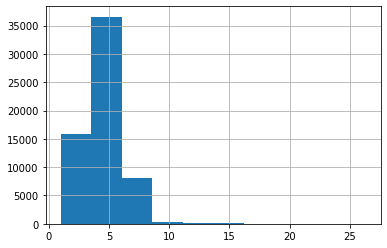

In [187]:
data5["HpHp_L0.01_weight"].hist()

<AxesSubplot:>

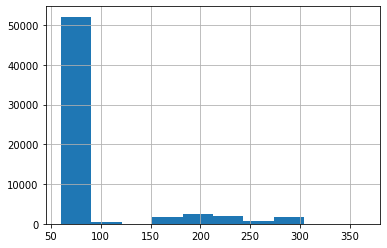

In [188]:
data5["HpHp_L0.01_mean"].hist()

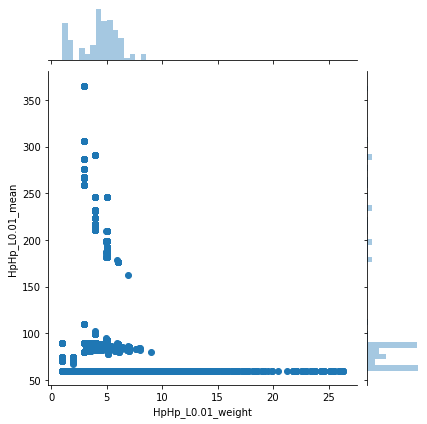

In [189]:
sns.jointplot(x = "HpHp_L0.01_weight", y = "HpHp_L0.01_mean", data = data5)

<AxesSubplot:>

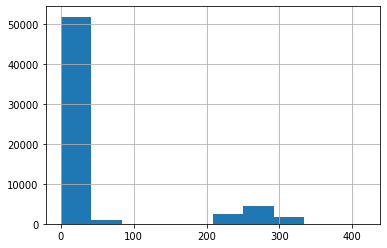

In [190]:
data5["HpHp_L0.01_std"].hist()

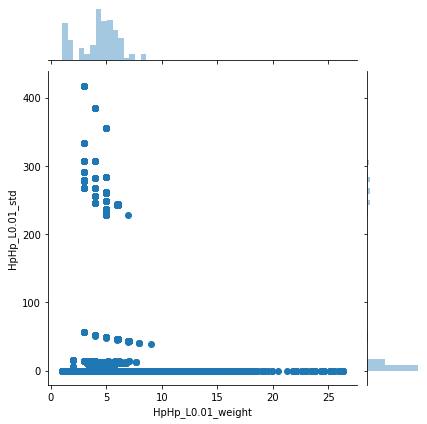

In [191]:
sns.jointplot(x = "HpHp_L0.01_weight", y = "HpHp_L0.01_std", data = data5)

<AxesSubplot:>

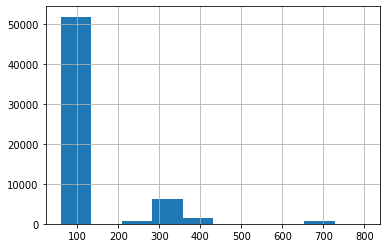

In [192]:
data5["HpHp_L0.01_magnitude"].hist()

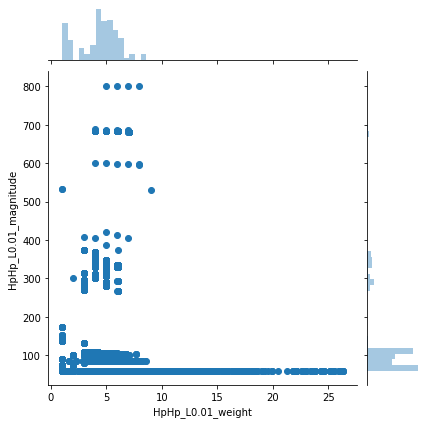

In [193]:
sns.jointplot(x = "HpHp_L0.01_weight", y = "HpHp_L0.01_magnitude", data = data5)

<AxesSubplot:>

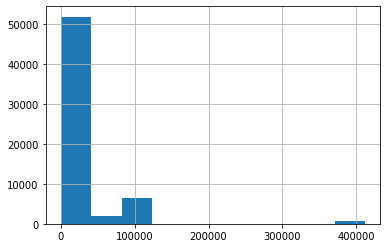

In [194]:
data5["HpHp_L0.01_radius"].hist()

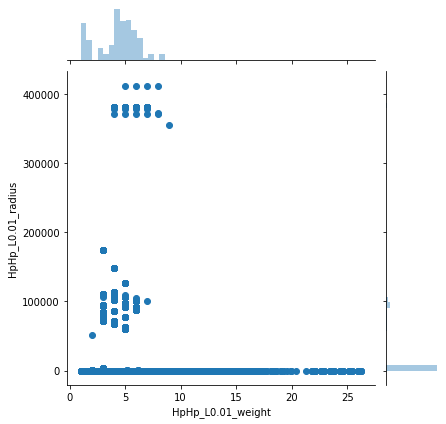

In [195]:
sns.jointplot(x = "HpHp_L0.01_weight", y = "HpHp_L0.01_radius", data = data5)

In [196]:
(data5["HpHp_L0.01_radius"] > 300000).value_counts()

False    60461
True       696
Name: HpHp_L0.01_radius, dtype: int64

In [197]:
mask = (data5["HpHp_L0.01_radius"] <= 300000)
data5 = data5[mask]

<AxesSubplot:>

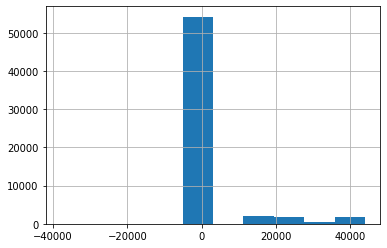

In [198]:
data5["HpHp_L0.01_covariance"].hist()

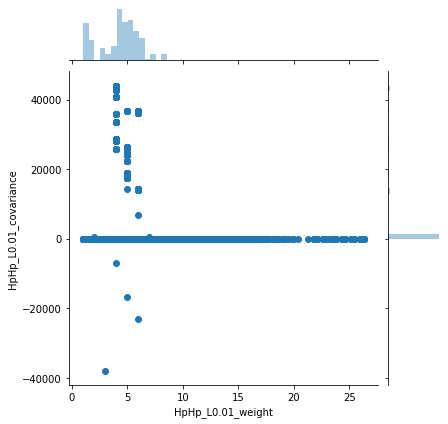

In [199]:
sns.jointplot(x = "HpHp_L0.01_weight", y = "HpHp_L0.01_covariance", data = data5)

In [200]:
(data5["HpHp_L0.01_covariance"] < -4).value_counts()

False    60431
True        30
Name: HpHp_L0.01_covariance, dtype: int64

In [201]:
mask = (data5["HpHp_L0.01_covariance"] >= -4)
data5 = data5[mask]

<AxesSubplot:>

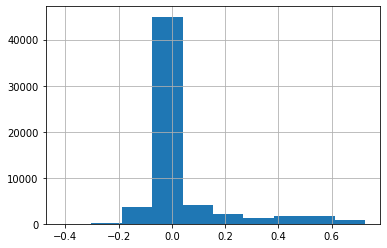

In [202]:
data5["HpHp_L0.01_pcc"].hist()

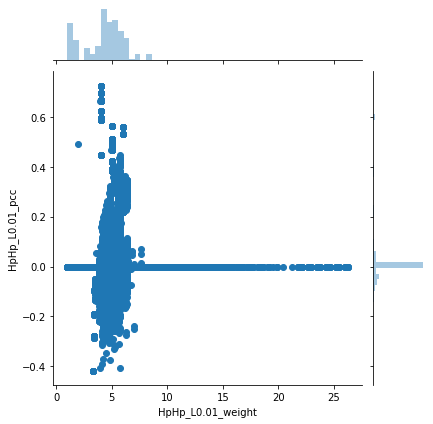

In [203]:
sns.jointplot(x = "HpHp_L0.01_weight", y = "HpHp_L0.01_pcc", data = data5)

<AxesSubplot:>

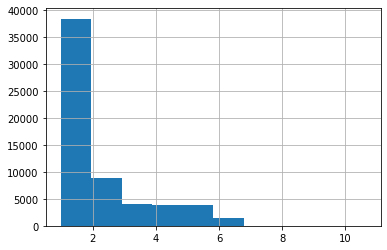

In [204]:
data5["HpHp_L0.1_weight"].hist()

<AxesSubplot:>

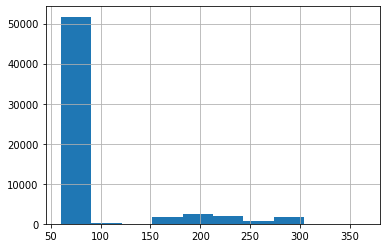

In [205]:
data5["HpHp_L0.1_mean"].hist()

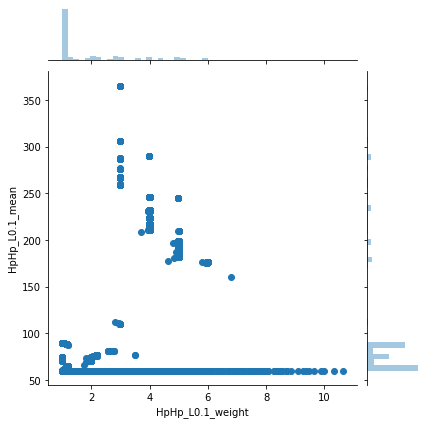

In [206]:
sns.jointplot(x = "HpHp_L0.1_weight", y = "HpHp_L0.1_mean", data = data5)

<AxesSubplot:>

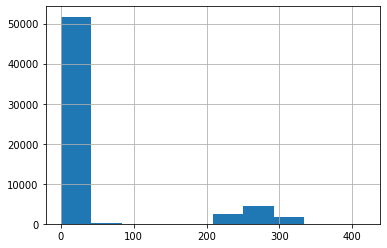

In [207]:
data5["HpHp_L0.1_std"].hist()

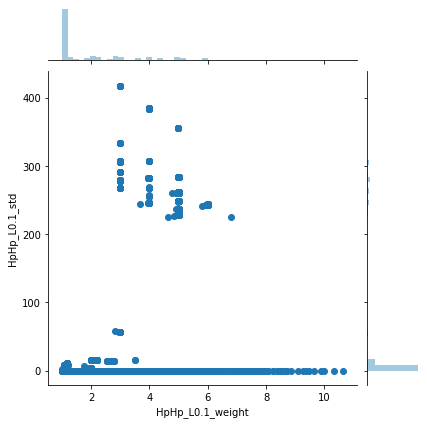

In [208]:
sns.jointplot(x = "HpHp_L0.1_weight", y = "HpHp_L0.1_std", data = data5)

<AxesSubplot:>

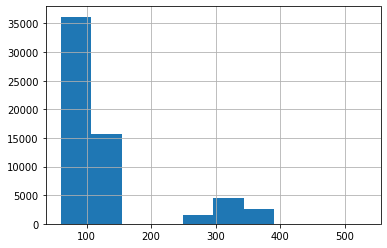

In [209]:
data5["HpHp_L0.1_magnitude"].hist()

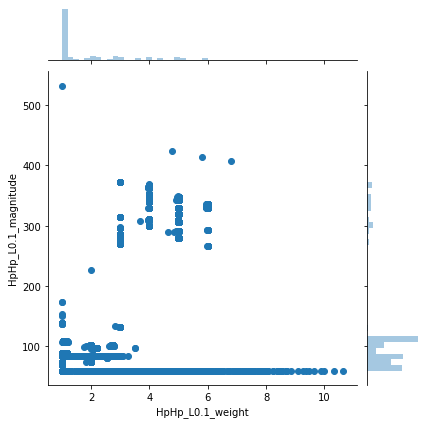

In [210]:
sns.jointplot(x = "HpHp_L0.1_weight", y = "HpHp_L0.1_magnitude", data = data5)

In [211]:
(data5["HpHp_L0.1_magnitude"] > 500).value_counts()

False    60430
True         1
Name: HpHp_L0.1_magnitude, dtype: int64

In [212]:
mask = (data5["HpHp_L0.1_magnitude"] <= 500)
data5 = data5[mask]

<AxesSubplot:>

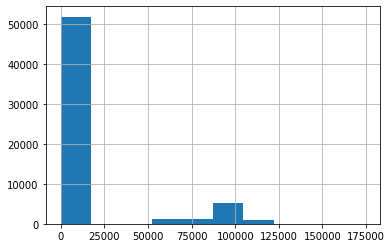

In [213]:
data5["HpHp_L0.1_radius"].hist()

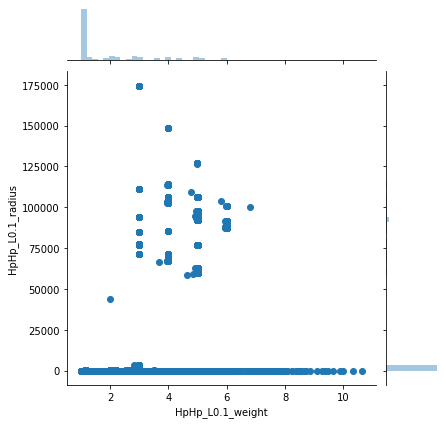

In [214]:
sns.jointplot(x = "HpHp_L0.1_weight", y = "HpHp_L0.1_radius", data = data5)

In [215]:
(data5["HpHp_L0.1_radius"] > 130000).value_counts()

False    60364
True        66
Name: HpHp_L0.1_radius, dtype: int64

In [216]:
mask = (data5["HpHp_L0.1_radius"] <= 130000)
data5 = data5[mask]

<AxesSubplot:>

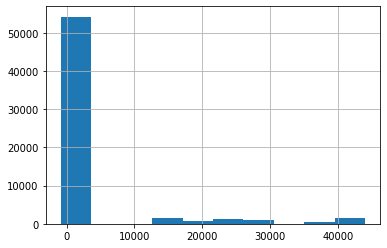

In [217]:
data5["HpHp_L0.1_covariance"].hist()

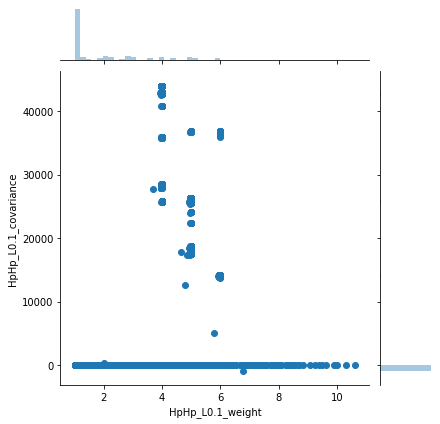

In [218]:
sns.jointplot(x = "HpHp_L0.1_weight", y = "HpHp_L0.1_covariance", data = data5)

<AxesSubplot:>

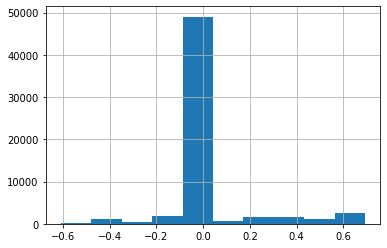

In [219]:
data5["HpHp_L0.1_pcc"].hist()

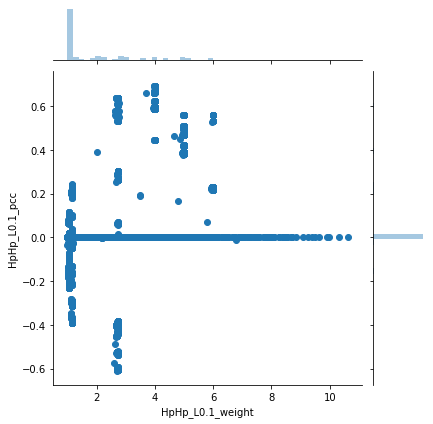

In [220]:
sns.jointplot(x = "HpHp_L0.1_weight", y = "HpHp_L0.1_pcc", data = data5)

<AxesSubplot:>

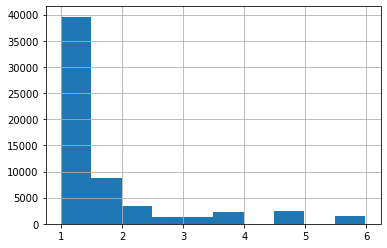

In [221]:
data5["HpHp_L1_weight"].hist()

<AxesSubplot:>

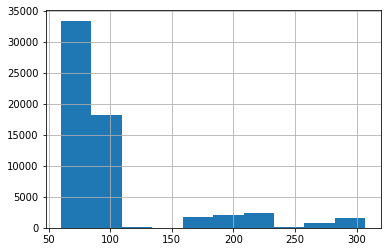

In [222]:
data5["HpHp_L1_mean"].hist()

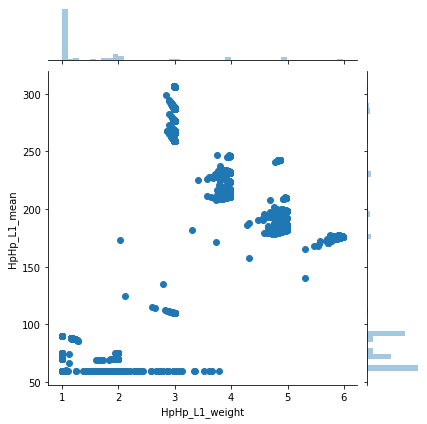

In [223]:
sns.jointplot(x = "HpHp_L1_weight", y = "HpHp_L1_mean", data = data5)

<AxesSubplot:>

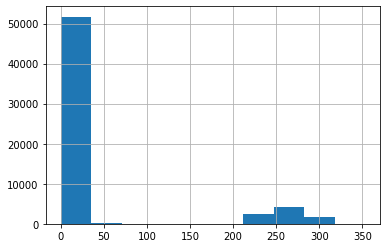

In [224]:
data5["HpHp_L1_std"].hist()

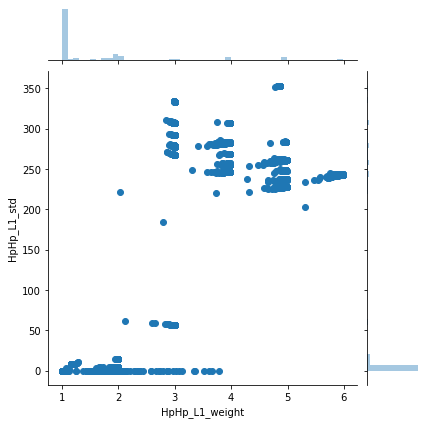

In [225]:
sns.jointplot(x = "HpHp_L1_weight", y = "HpHp_L1_std", data = data5)

<AxesSubplot:>

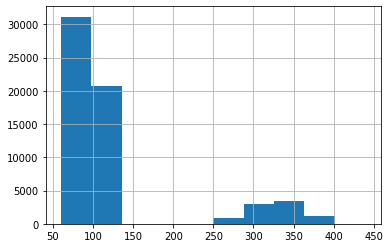

In [226]:
data5["HpHp_L1_magnitude"].hist()

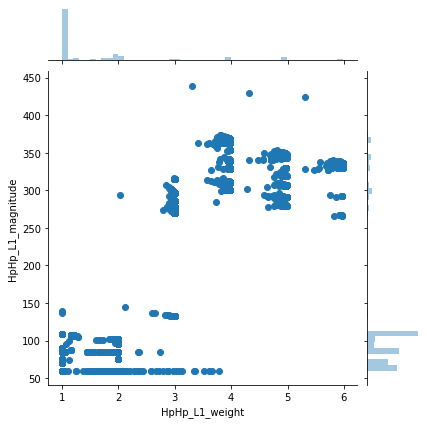

In [227]:
sns.jointplot(x = "HpHp_L1_weight", y = "HpHp_L1_magnitude", data = data5)

In [228]:
(data5["HpHp_L1_magnitude"] > 400).value_counts()

False    60361
True         3
Name: HpHp_L1_magnitude, dtype: int64

In [229]:
mask = (data5["HpHp_L1_magnitude"] <= 400)
data5 = data5[mask]

<AxesSubplot:>

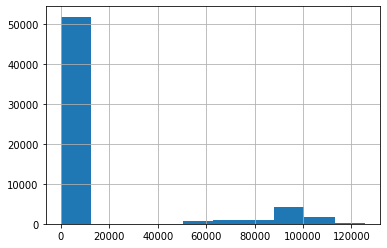

In [230]:
data5["HpHp_L1_radius"].hist()

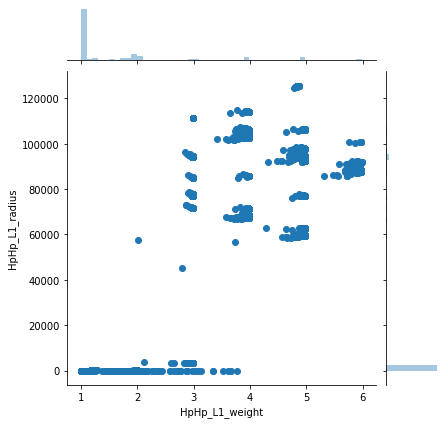

In [231]:
sns.jointplot(x = "HpHp_L1_weight", y = "HpHp_L1_radius", data = data5)

<AxesSubplot:>

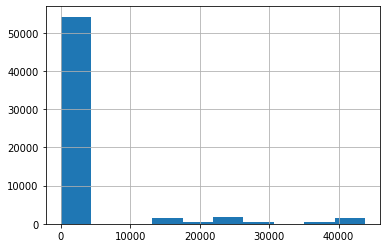

In [232]:
data5["HpHp_L1_covariance"].hist()

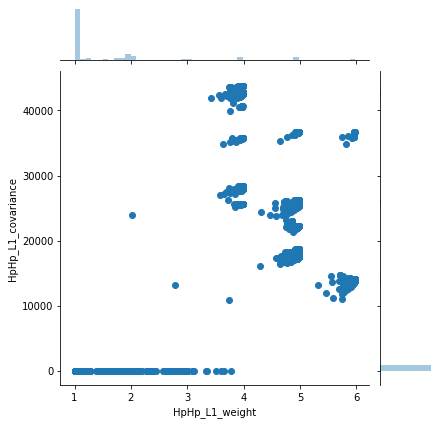

In [233]:
sns.jointplot(x = "HpHp_L1_weight", y = "HpHp_L1_covariance", data = data5)

<AxesSubplot:>

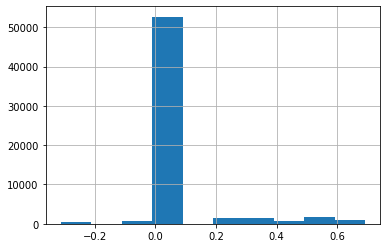

In [234]:
data5["HpHp_L1_pcc"].hist()

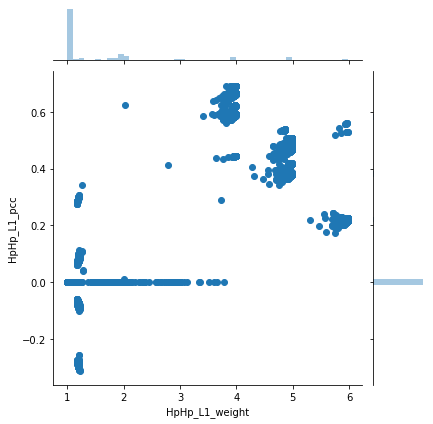

In [235]:
sns.jointplot(x = "HpHp_L1_weight", y = "HpHp_L1_pcc", data = data5)

<AxesSubplot:>

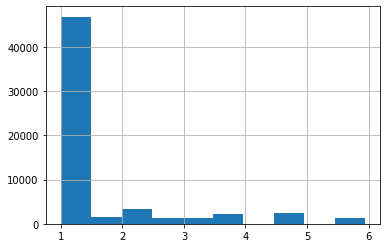

In [236]:
data5["HpHp_L3_weight"].hist()

<AxesSubplot:>

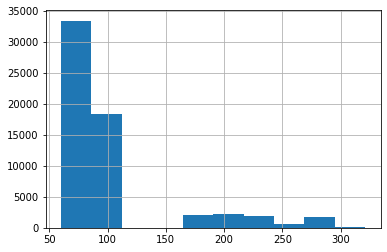

In [237]:
data5["HpHp_L3_mean"].hist()

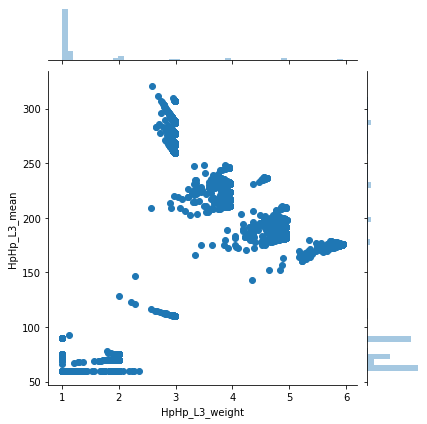

In [238]:
sns.jointplot(x = "HpHp_L3_weight", y = "HpHp_L3_mean", data = data5)

<AxesSubplot:>

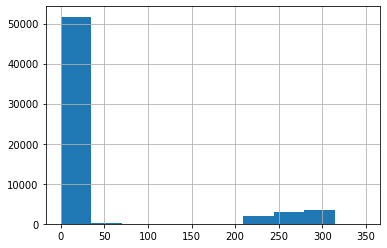

In [239]:
data5["HpHp_L3_std"].hist()

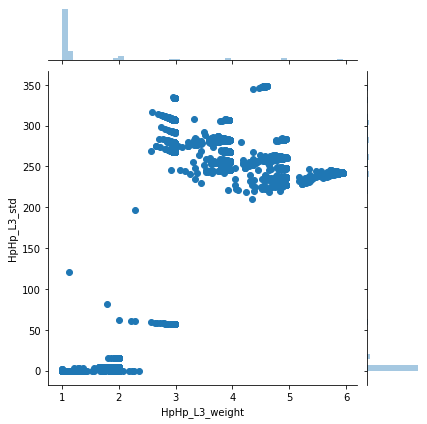

In [240]:
sns.jointplot(x = "HpHp_L3_weight", y = "HpHp_L3_std", data = data5)

<AxesSubplot:>

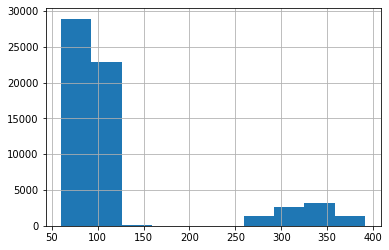

In [241]:
data5["HpHp_L3_magnitude"].hist()

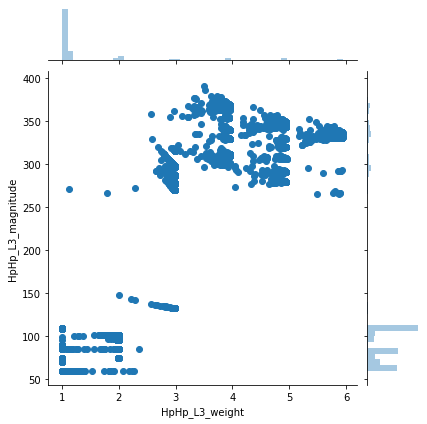

In [242]:
sns.jointplot(x = "HpHp_L3_weight", y = "HpHp_L3_magnitude", data = data5)

<AxesSubplot:>

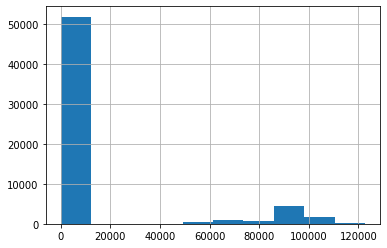

In [243]:
data5["HpHp_L3_radius"].hist()

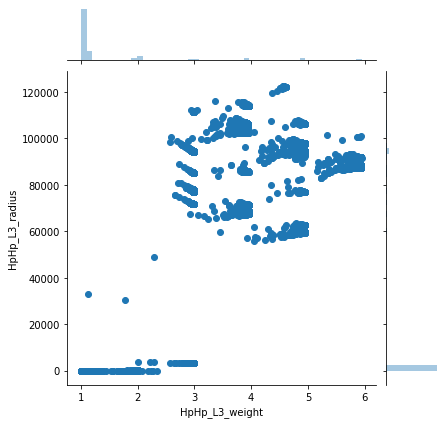

In [244]:
sns.jointplot(x = "HpHp_L3_weight", y = "HpHp_L3_radius", data = data5)

<AxesSubplot:>

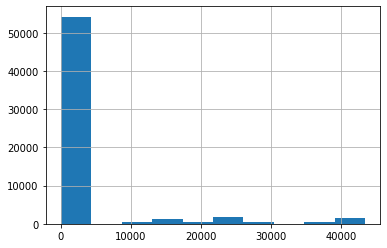

In [245]:
data5["HpHp_L3_covariance"].hist()

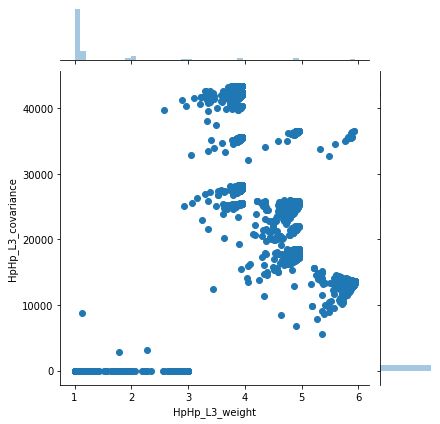

In [246]:
sns.jointplot(x = "HpHp_L3_weight", y = "HpHp_L3_covariance", data = data5)

<AxesSubplot:>

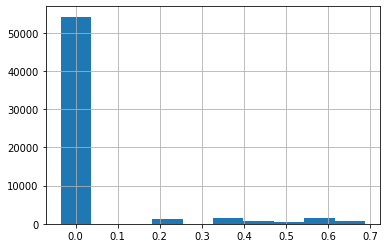

In [247]:
data5["HpHp_L3_pcc"].hist()

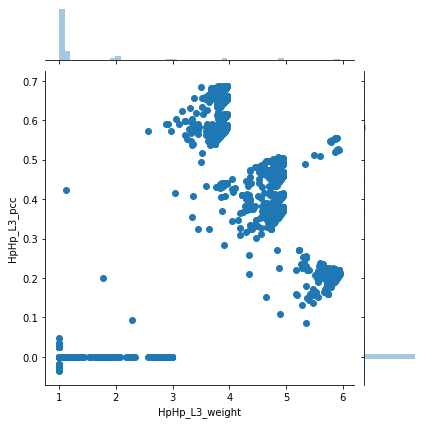

In [248]:
sns.jointplot(x = "HpHp_L3_weight", y = "HpHp_L3_pcc", data = data5)

<AxesSubplot:>

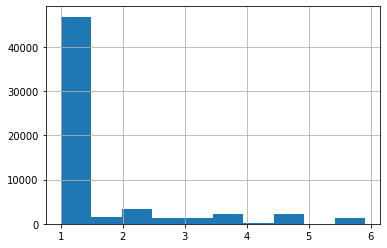

In [249]:
data5["HpHp_L5_weight"].hist()

<AxesSubplot:>

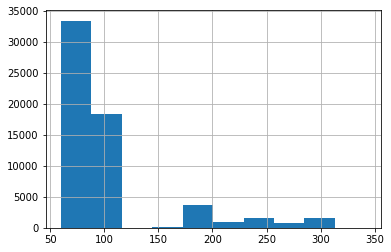

In [250]:
data5["HpHp_L5_mean"].hist()

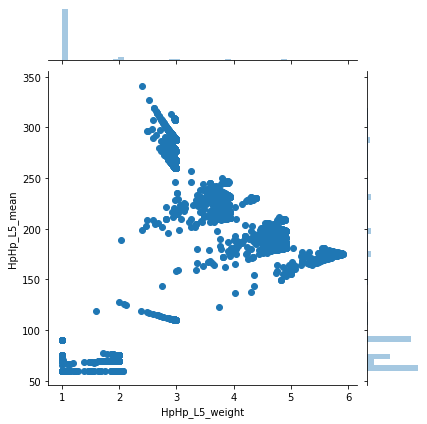

In [251]:
sns.jointplot(x = "HpHp_L5_weight", y = "HpHp_L5_mean", data = data5)

<AxesSubplot:>

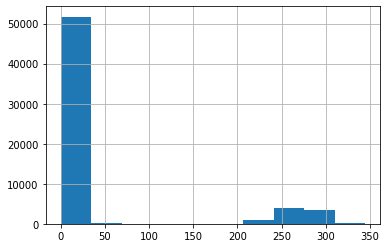

In [252]:
data5["HpHp_L5_std"].hist()

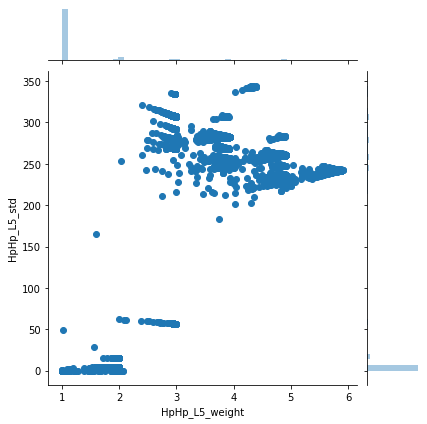

In [253]:
sns.jointplot(x = "HpHp_L5_weight", y = "HpHp_L5_std", data = data5)

<AxesSubplot:>

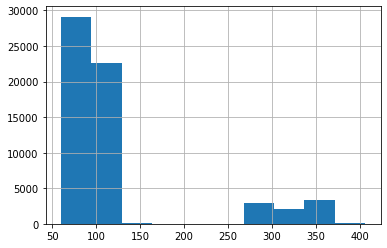

In [254]:
data5["HpHp_L5_magnitude"].hist()

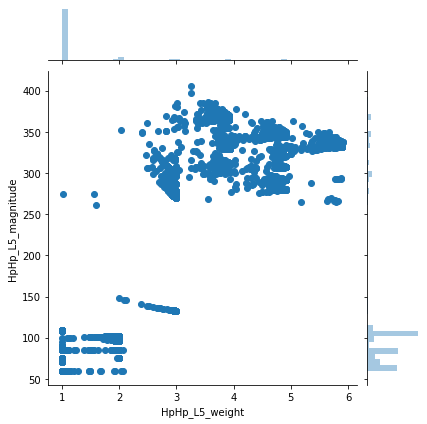

In [255]:
sns.jointplot(x = "HpHp_L5_weight", y = "HpHp_L5_magnitude", data = data5)

<AxesSubplot:>

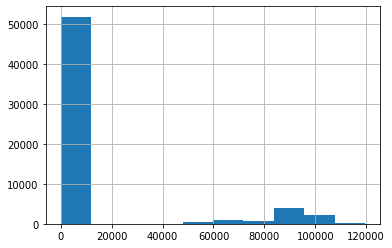

In [256]:
data5["HpHp_L5_radius"].hist()

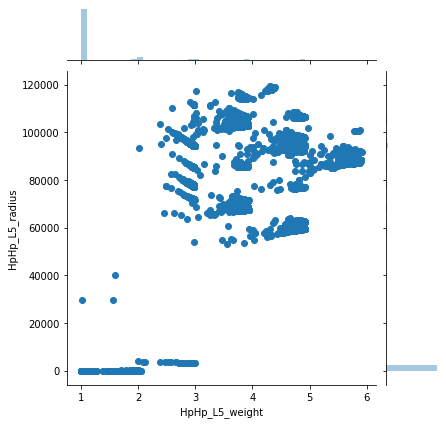

In [257]:
sns.jointplot(x = "HpHp_L5_weight", y = "HpHp_L5_radius", data = data5)

<AxesSubplot:>

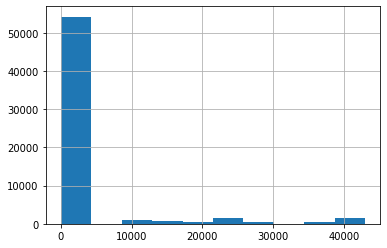

In [258]:
data5["HpHp_L5_covariance"].hist()

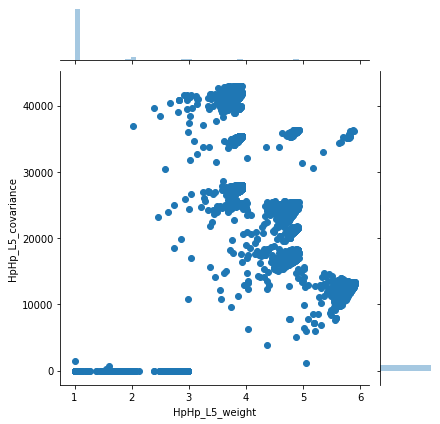

In [259]:
sns.jointplot(x = "HpHp_L5_weight", y = "HpHp_L5_covariance", data = data5)

<AxesSubplot:>

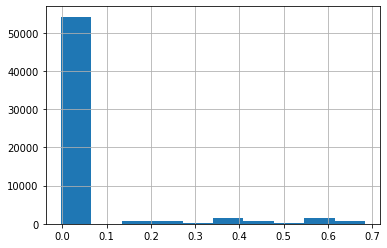

In [260]:
data5["HpHp_L5_pcc"].hist()

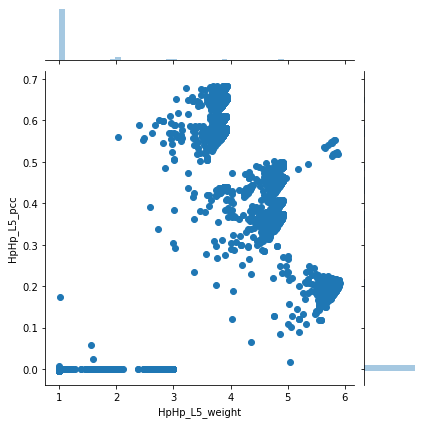

In [261]:
sns.jointplot(x = "HpHp_L5_weight", y = "HpHp_L5_pcc", data = data5)

In [262]:
data5.shape

(60361, 115)

In [263]:
x5 = pd.DataFrame(data5)#Ahora convertimos el array 'values' a un dataframe, usamos 'x' por que es la variable
                        #con la que vamos a crear el modelo.

In [264]:
x5.columns = data5.columns #Le ponemos las columnas de movies_v2

In [265]:
x5.index = data5.index # Le ponemos el index de movies_v2

In [266]:
x5.head() #dataframe limpio y listo para crear el modelo

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
123,2.990006,110.014375,3226.433741,3.116264,108.046208,3188.081706,3.987416,97.597854,2883.451422,31.153094,...,3211.136511,0.0000,0.000000,2.999916,110.001098,56.663160,132.575418,3210.71366,0.0000,0.000000
128,7.697070,83.125775,1602.256633,7.934166,82.929311,1598.066589,8.915530,80.857961,1501.520453,36.112762,...,0.000000,0.0000,0.000000,1.000000,74.000000,0.000000,74.000000,0.00000,0.0000,0.000000
129,8.545122,81.121617,1445.057324,8.839814,81.014190,1446.040003,9.880048,79.354126,1369.627838,37.098364,...,15.999999,0.0000,0.000000,1.999960,69.999920,4.000000,101.862598,16.00000,0.0000,0.000000
130,9.504885,139.605056,30382.390880,9.814816,137.661795,29585.020950,10.870726,130.652068,27218.242440,38.094863,...,71459.861230,0.0000,0.000000,2.999941,259.003648,267.307662,269.367574,71453.38626,0.0000,0.000000
131,10.299858,132.458835,27907.533050,10.687235,130.956431,27252.319610,11.823418,125.183931,25239.806210,39.078252,...,67333.922560,27991.5924,0.663272,3.999810,210.750449,246.117584,309.385330,67332.04205,28001.7186,0.663532


In [267]:
x5.shape

(60361, 115)

In [268]:
x5.to_csv('/home/edinson/Documentos/U-distrital/Preprocesing/Repositorio/x5.csv', index=False)
#Guardamos el archivo listo para crear el modelo.